# Importing required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Warnings to ignore

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Code to display all columns

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Reading the CSV file

In [4]:
leads = pd.read_csv('Leads.csv')

# Checking first 5 rows of file 

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Checking Data types and null values

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Checking Shape of the data

In [7]:
leads.shape

(9240, 37)

# Current Conversion rate

In [8]:
round(leads["Converted"].sum()/len(leads.index),2)

0.39

# Checking of missing values

In [9]:
100*leads.isnull().mean().sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

# Checking of duplicated entry

In [10]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [11]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

# EDA

## Unnecessary columns removal

In [12]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [13]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Replacing 'select' which was not mentioned as must fill input kept as it is

In [14]:
leads = leads.replace('Select', np.nan)

# Removing randomly inputted unnecessary columns

In [15]:
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, axis=1, inplace = True)

In [16]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [17]:
# checking of null values after dropping the columns

100*leads.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

# Data Visualization with count plot

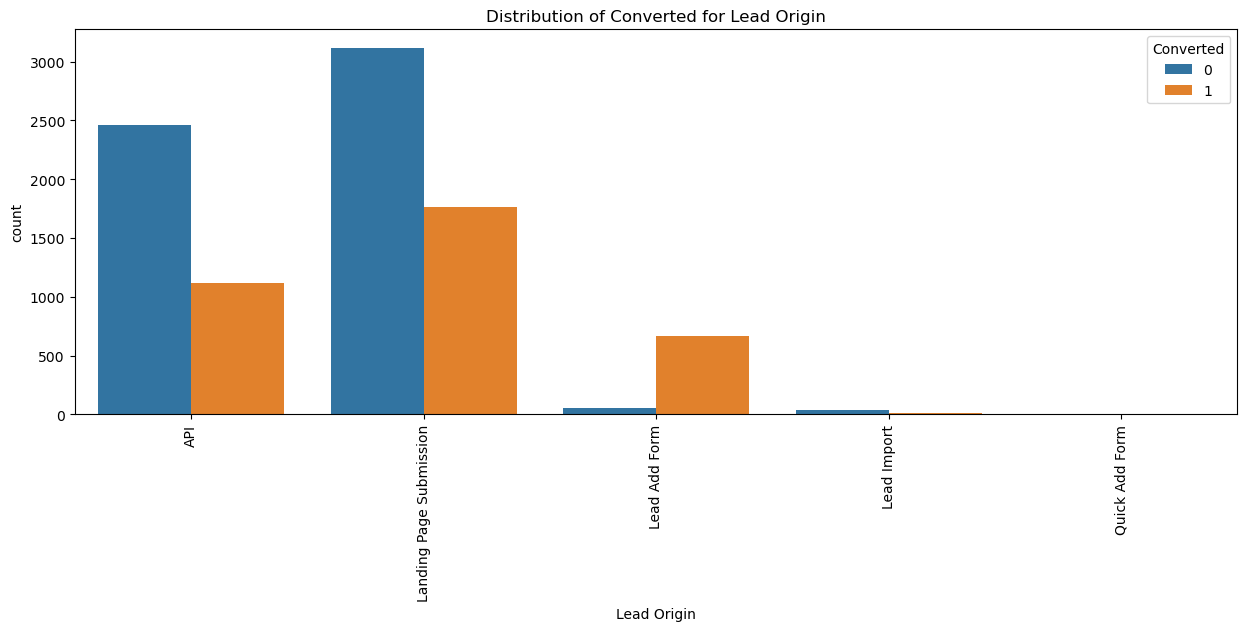

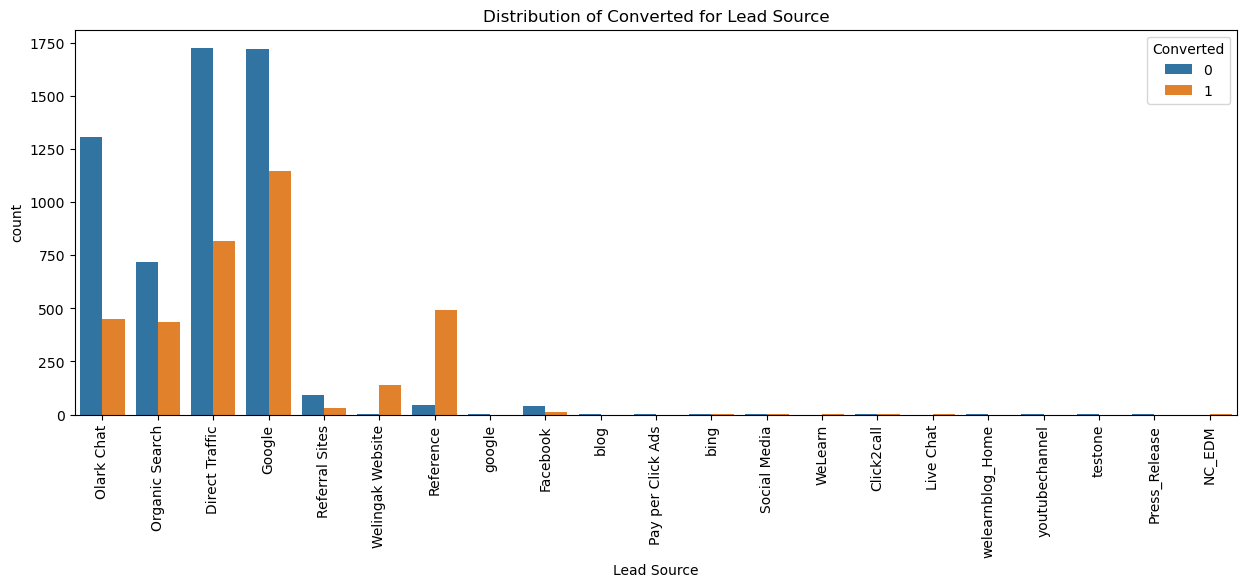

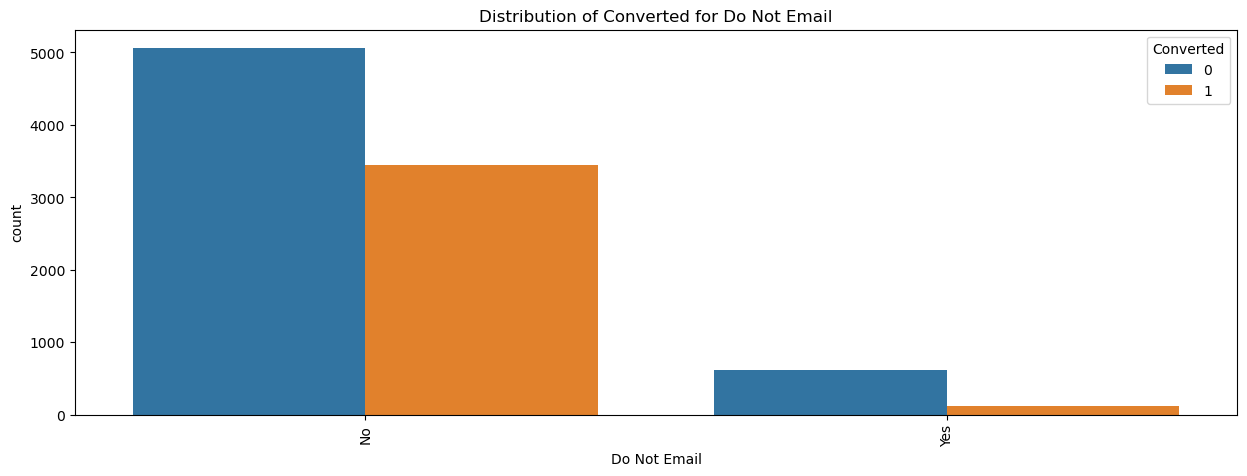

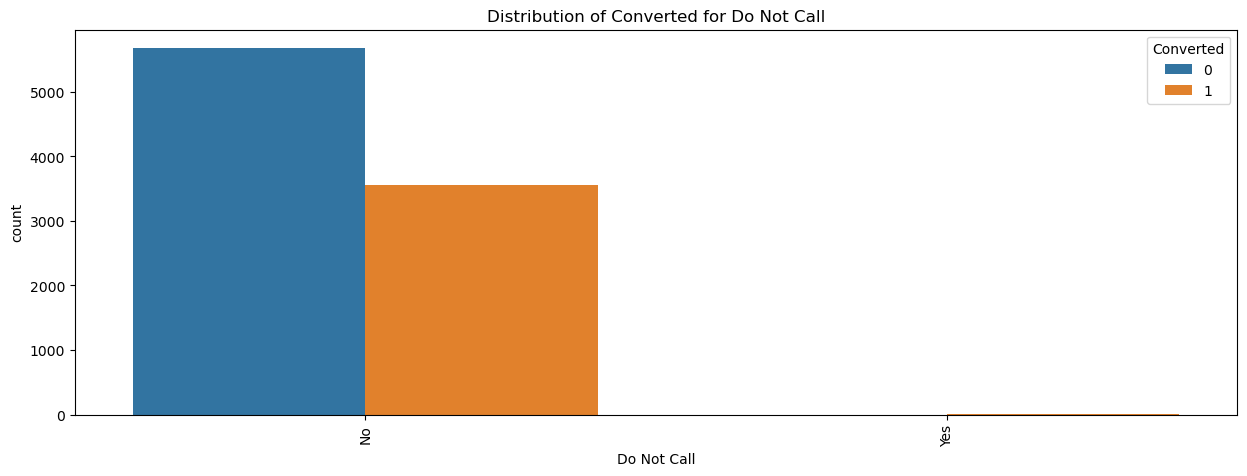

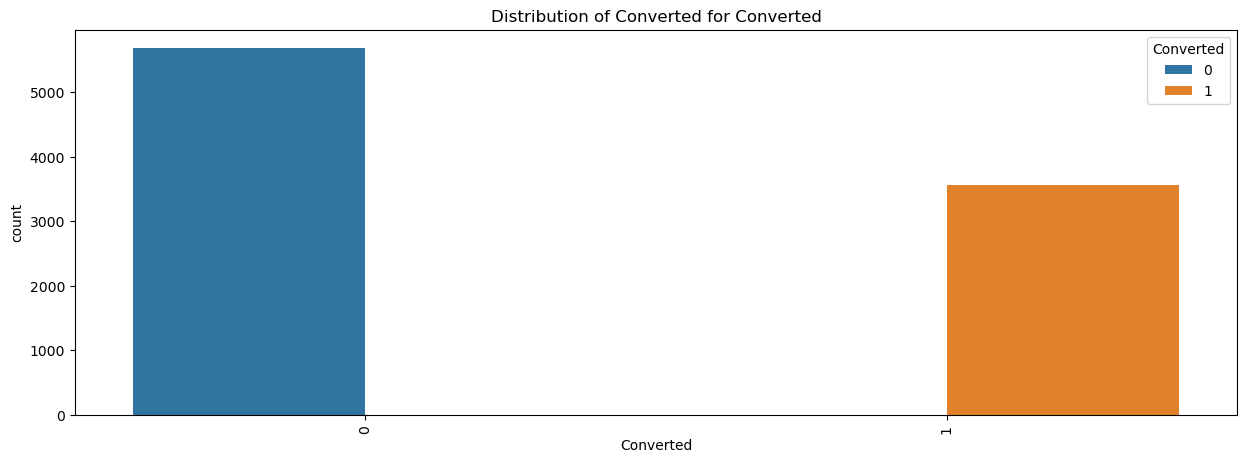

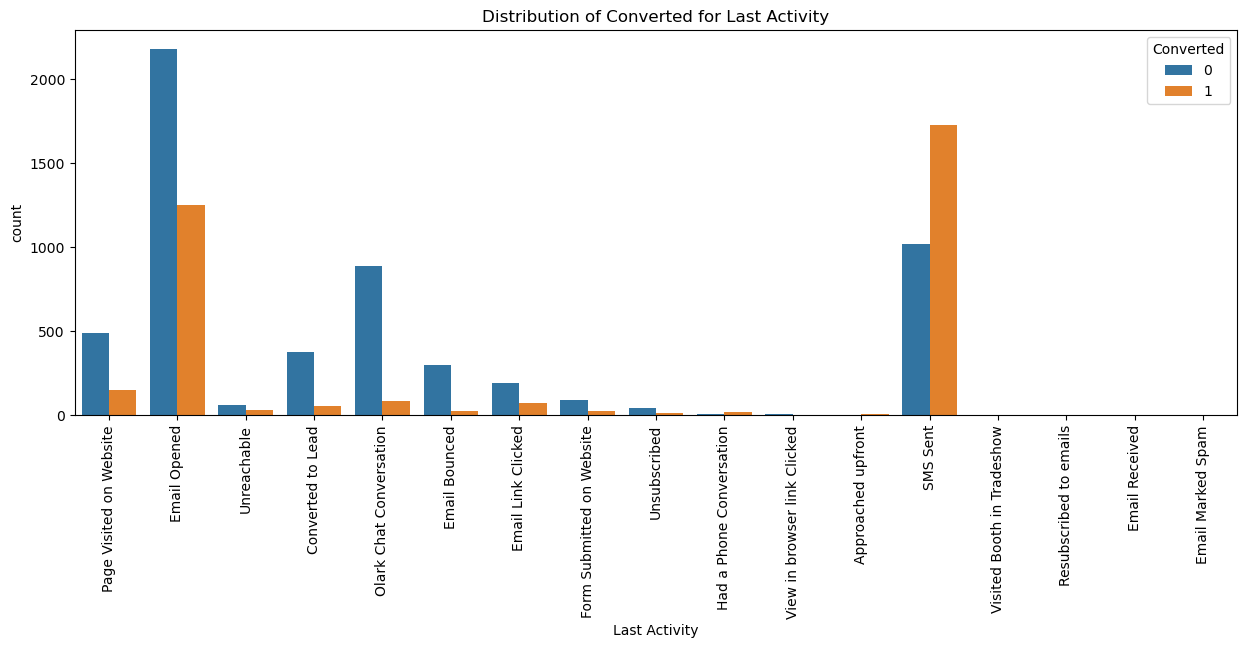

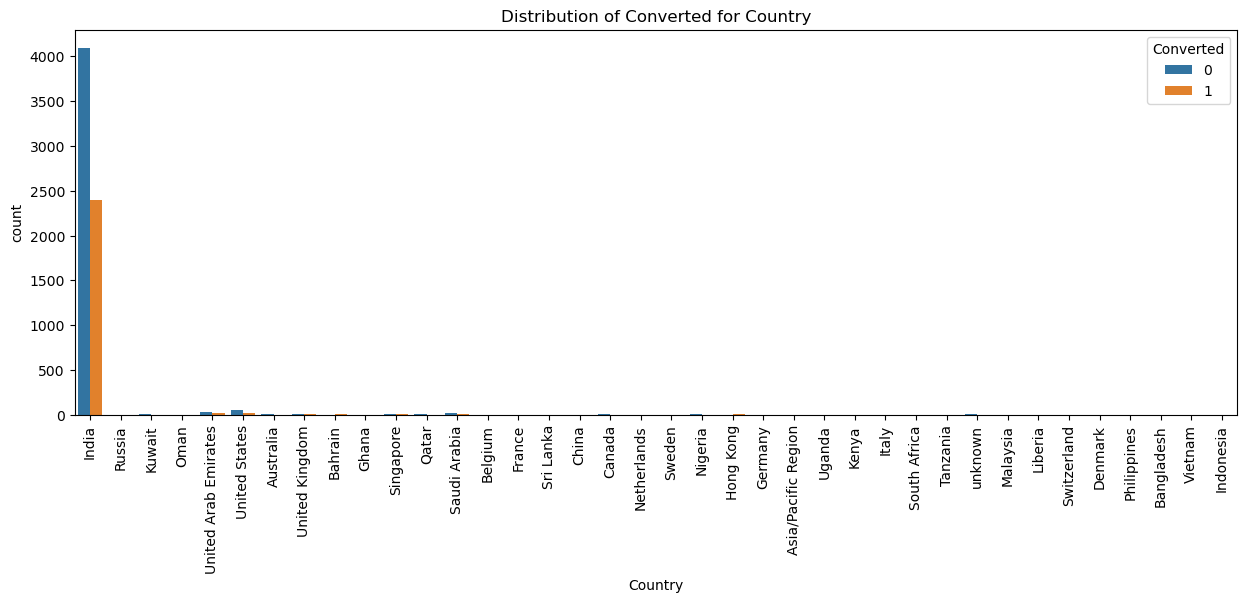

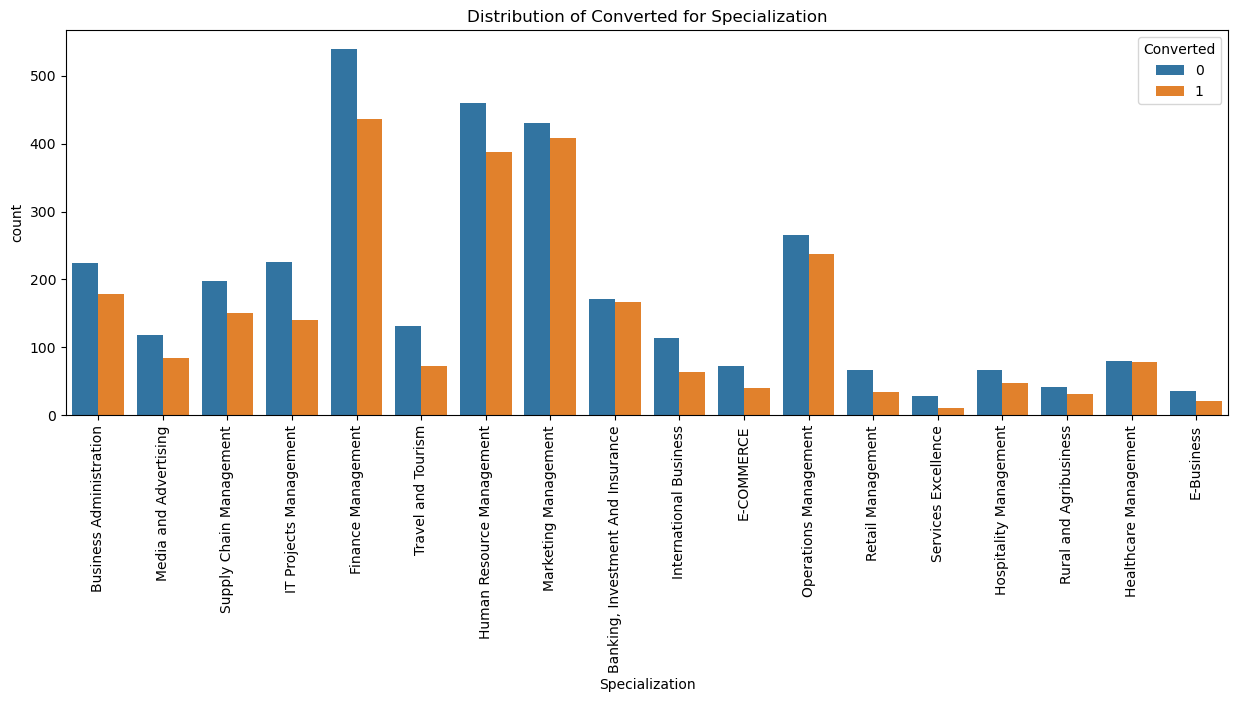

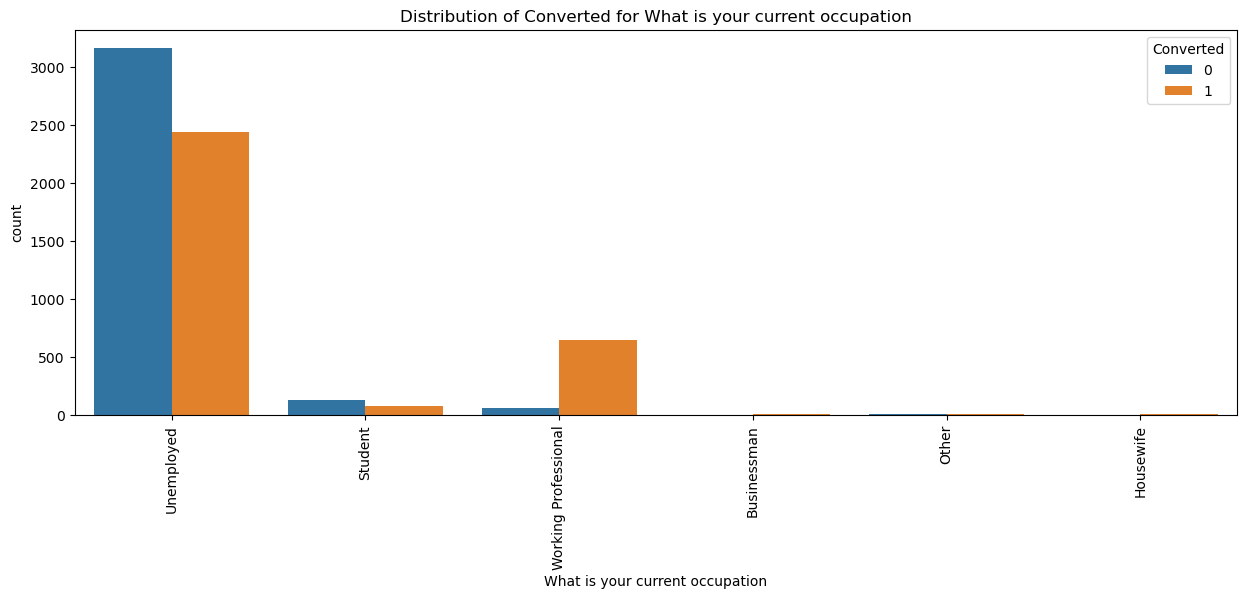

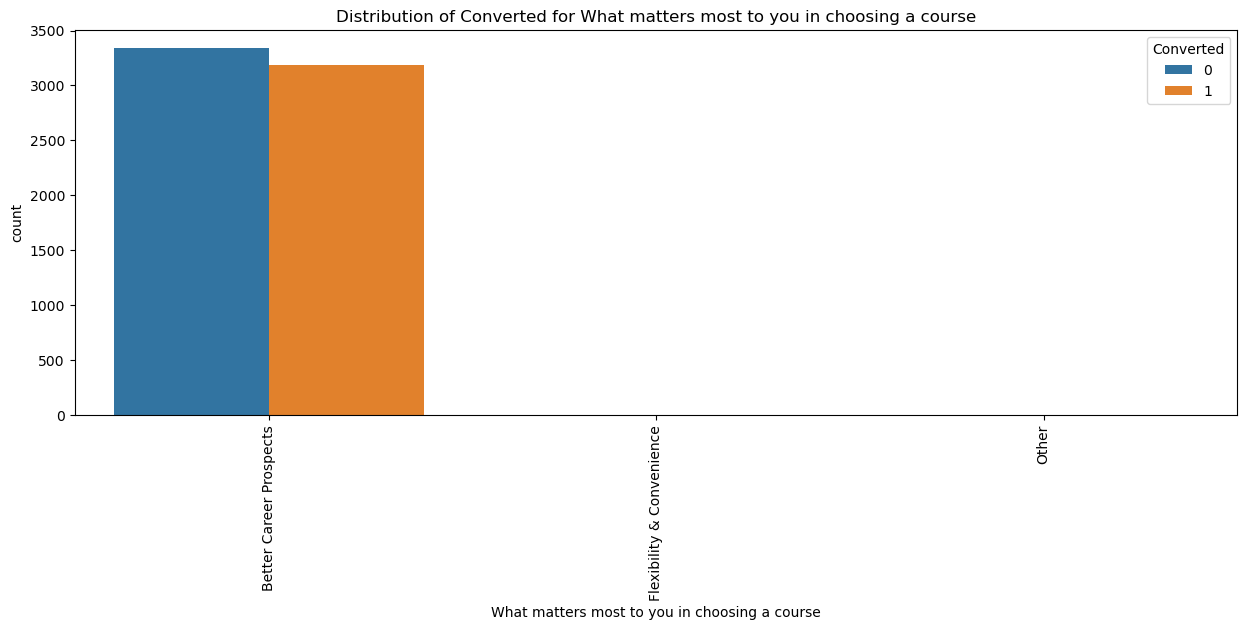

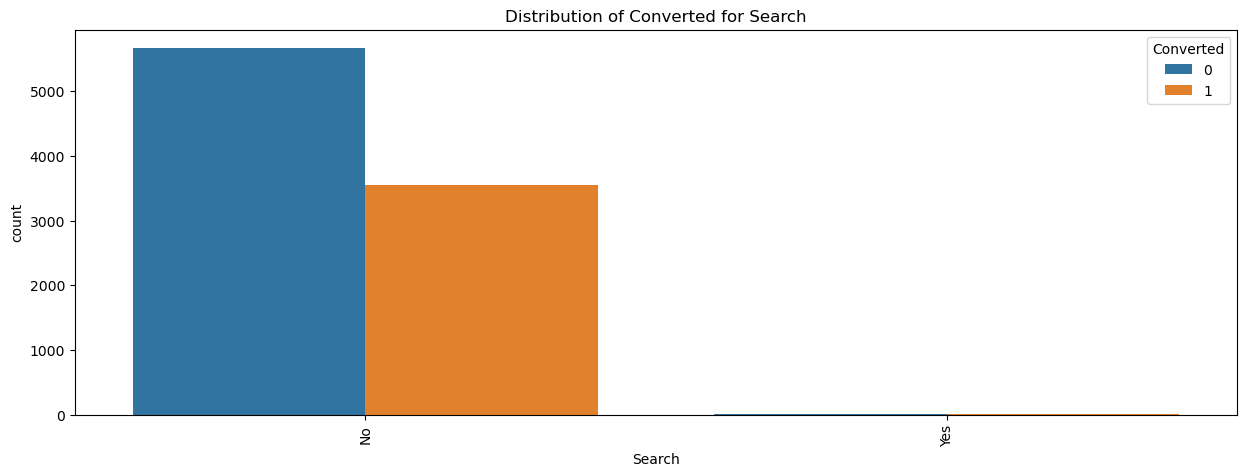

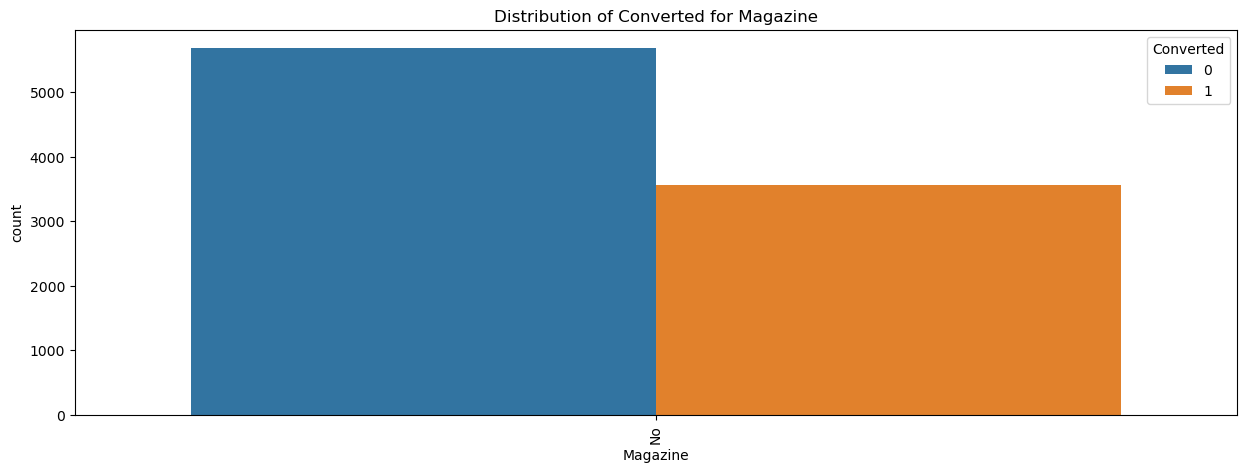

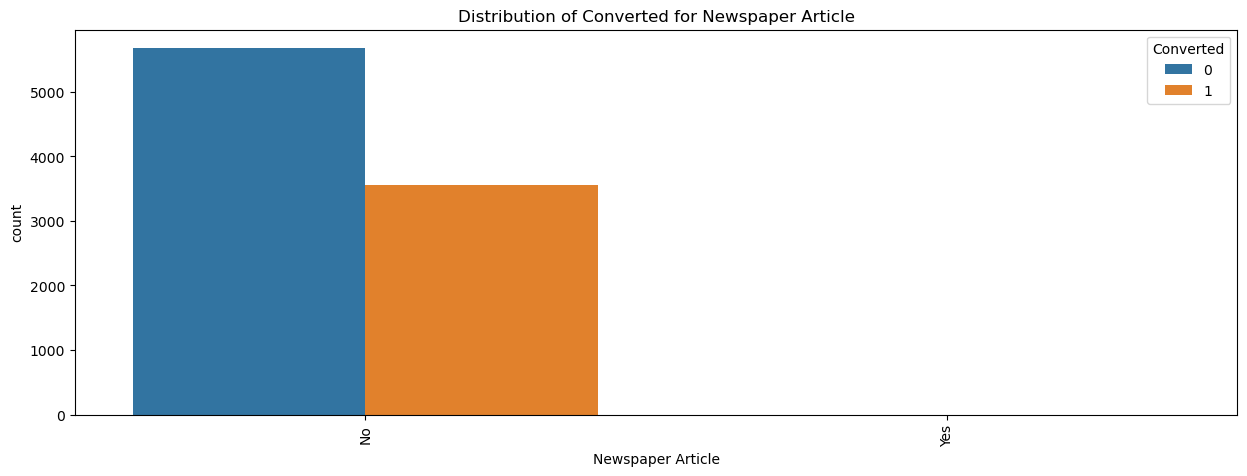

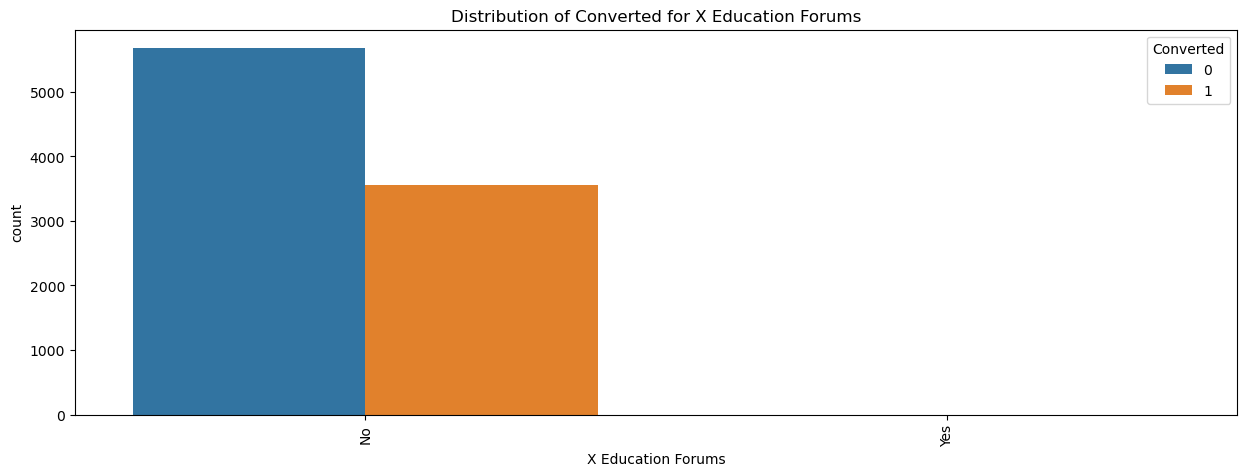

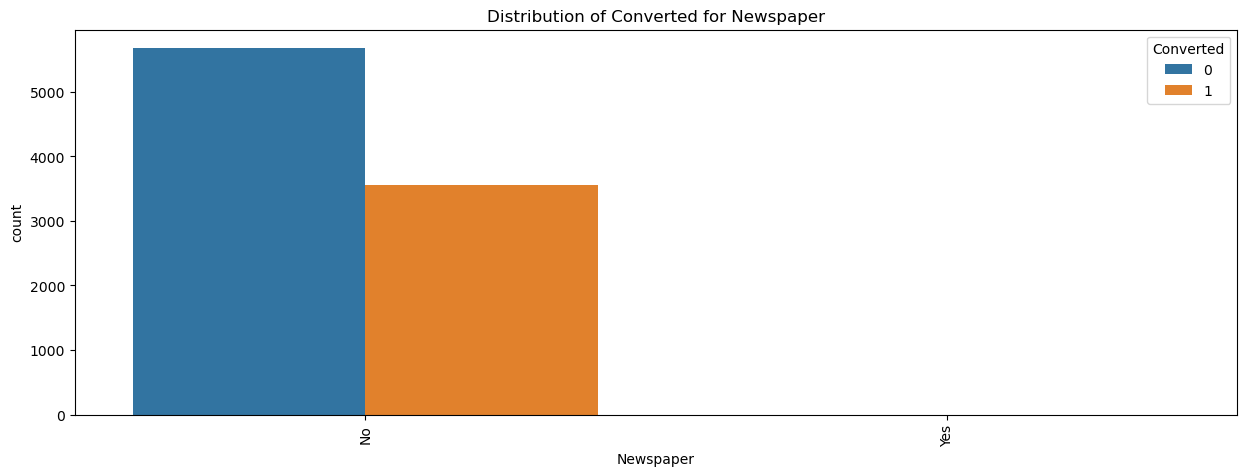

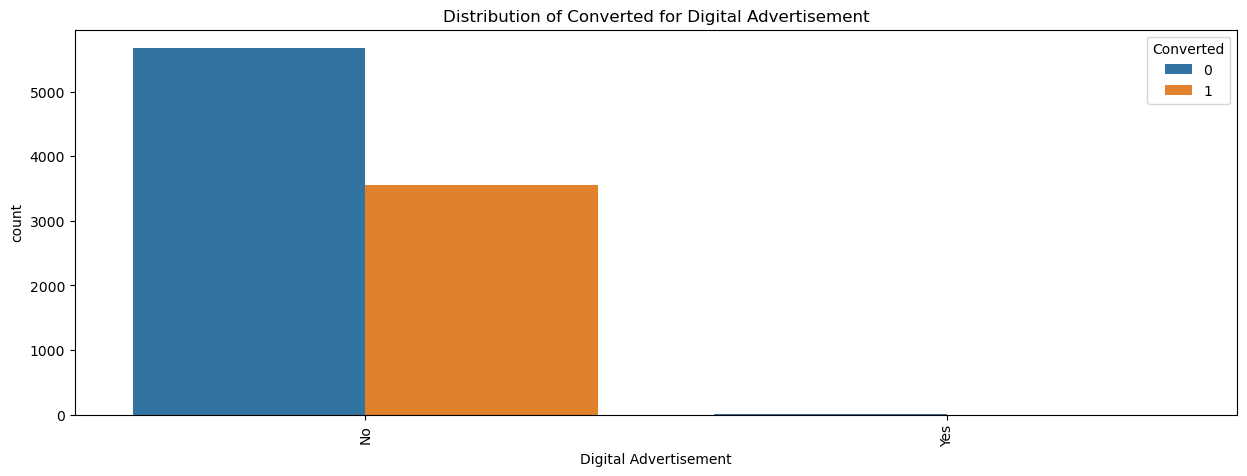

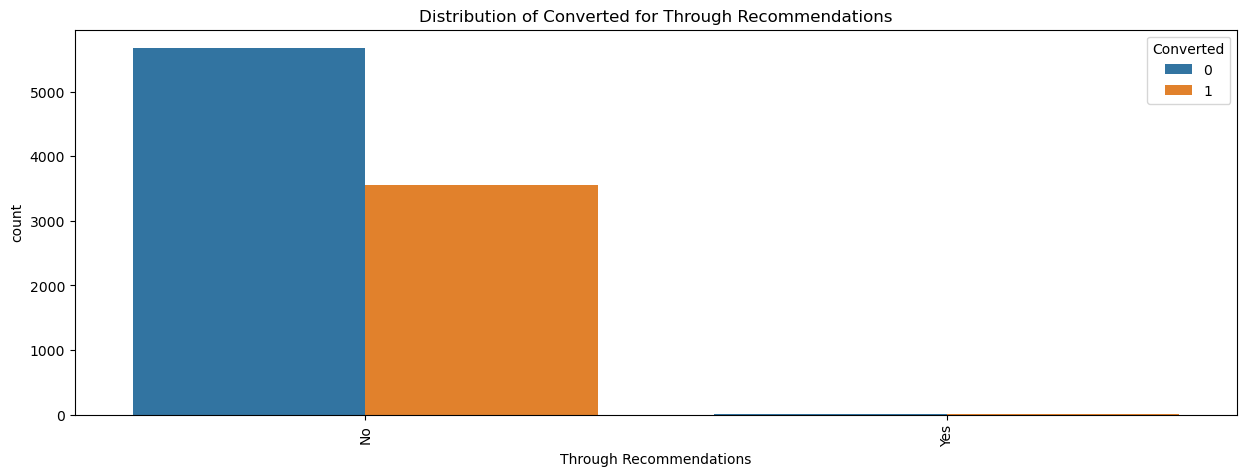

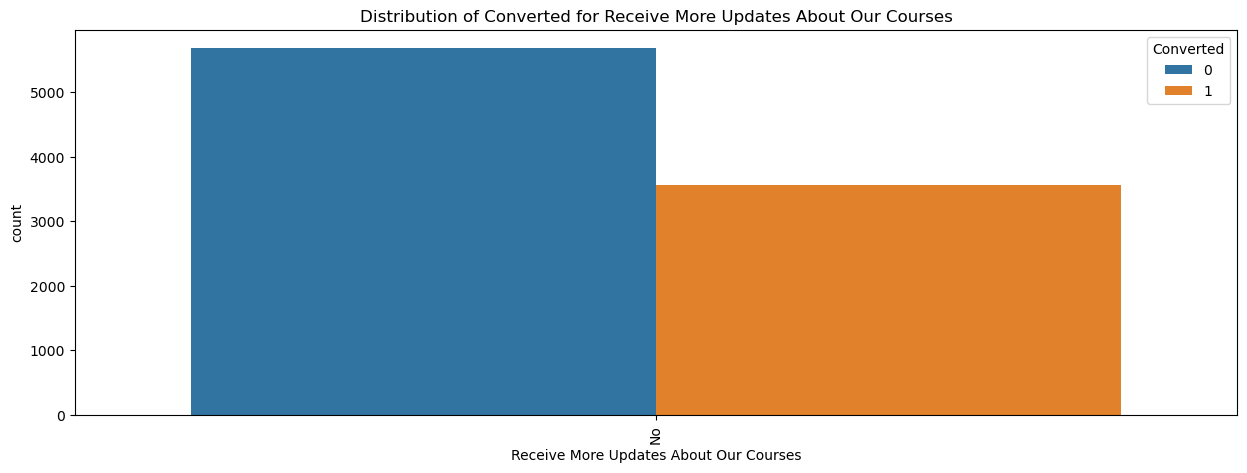

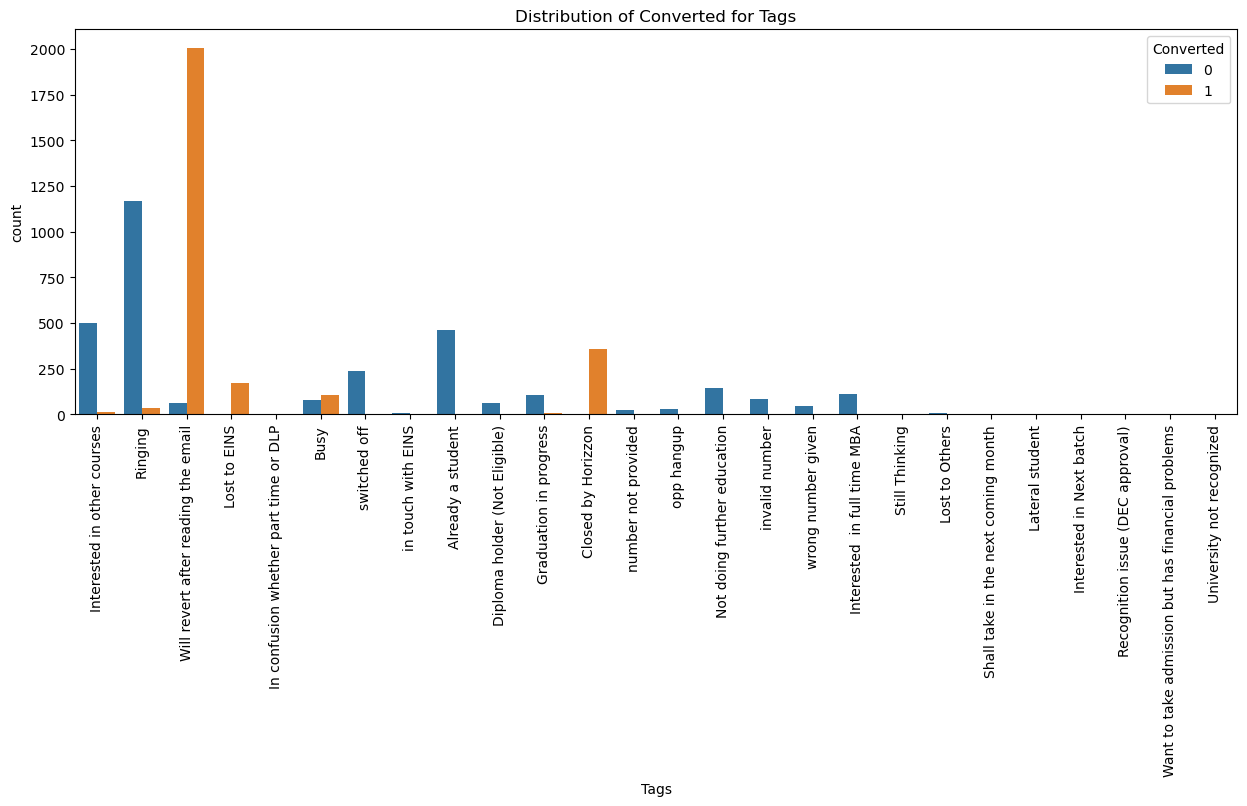

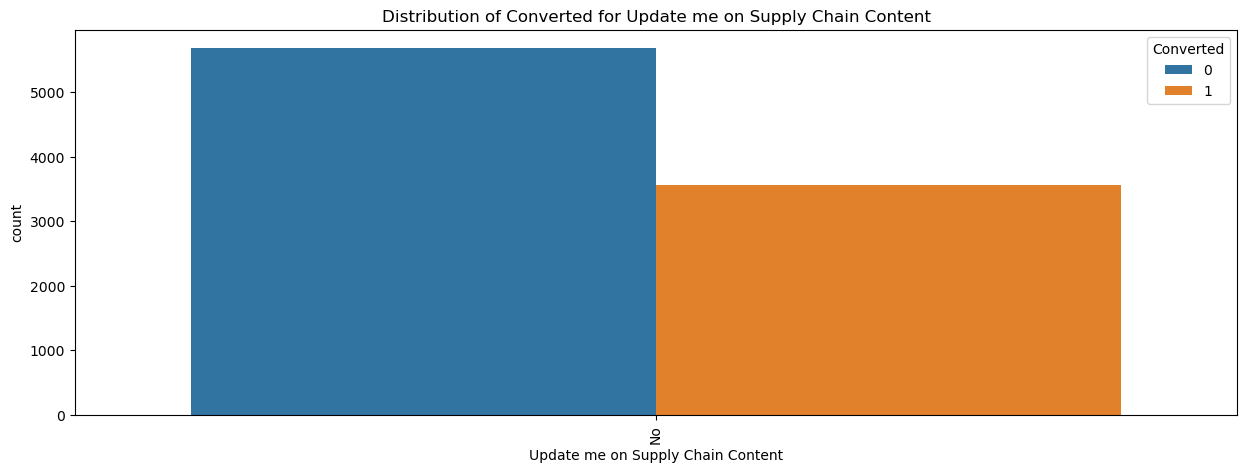

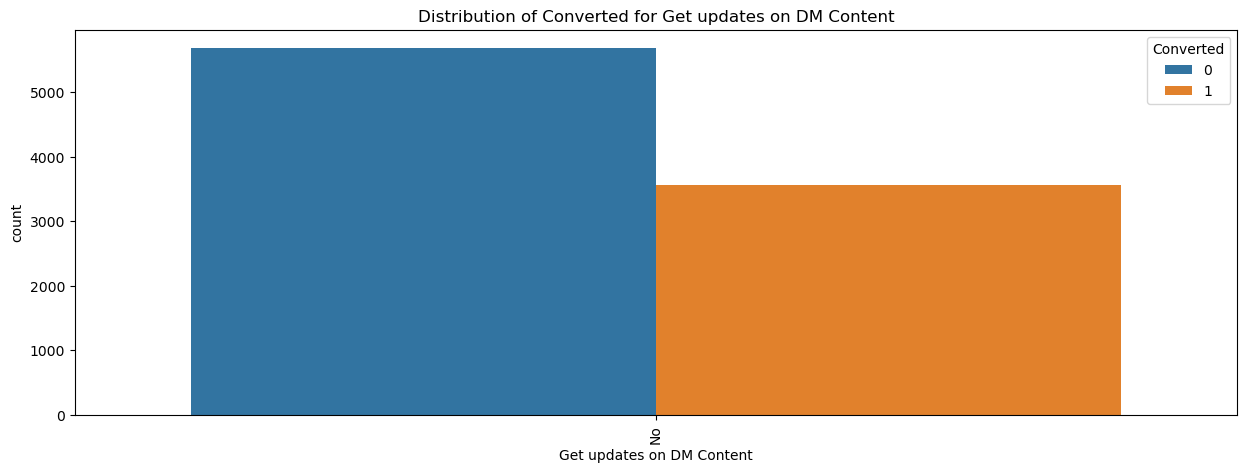

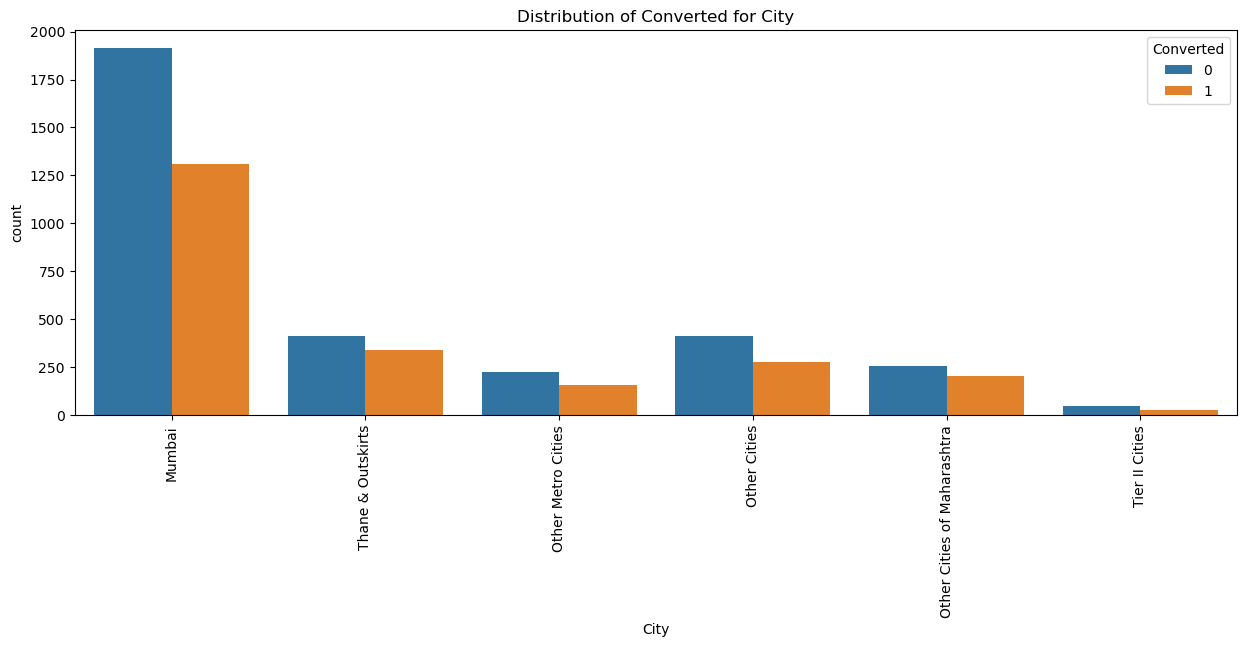

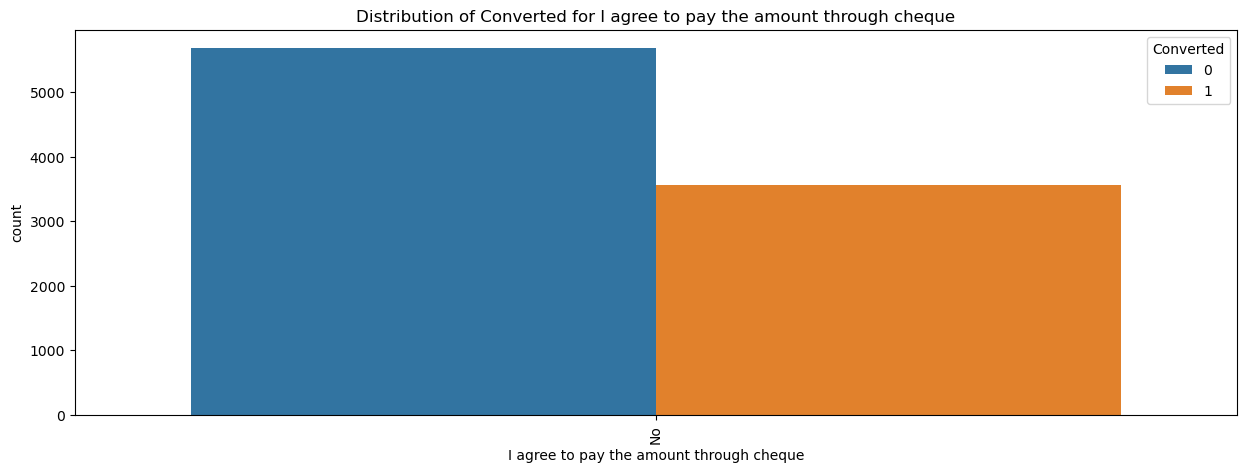

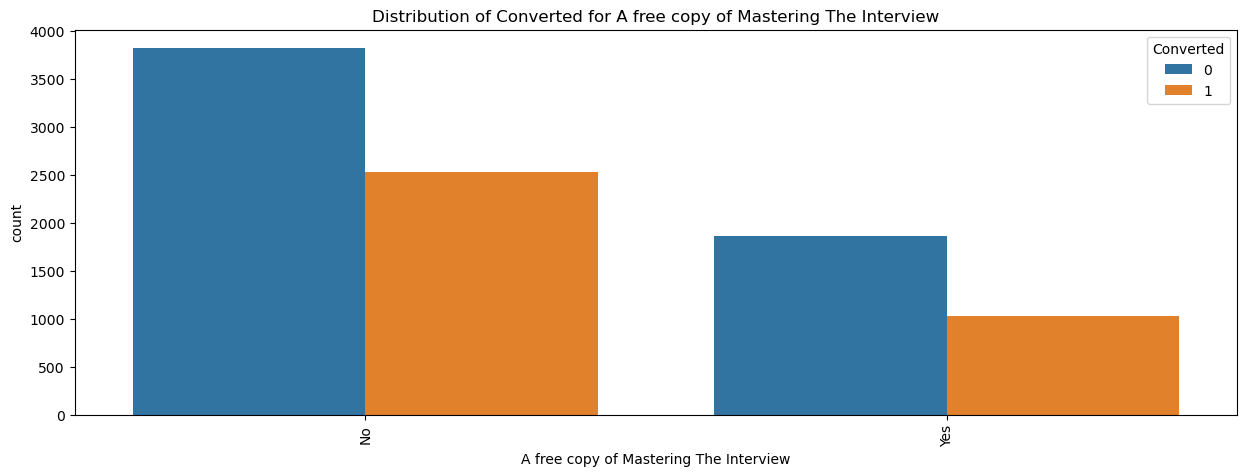

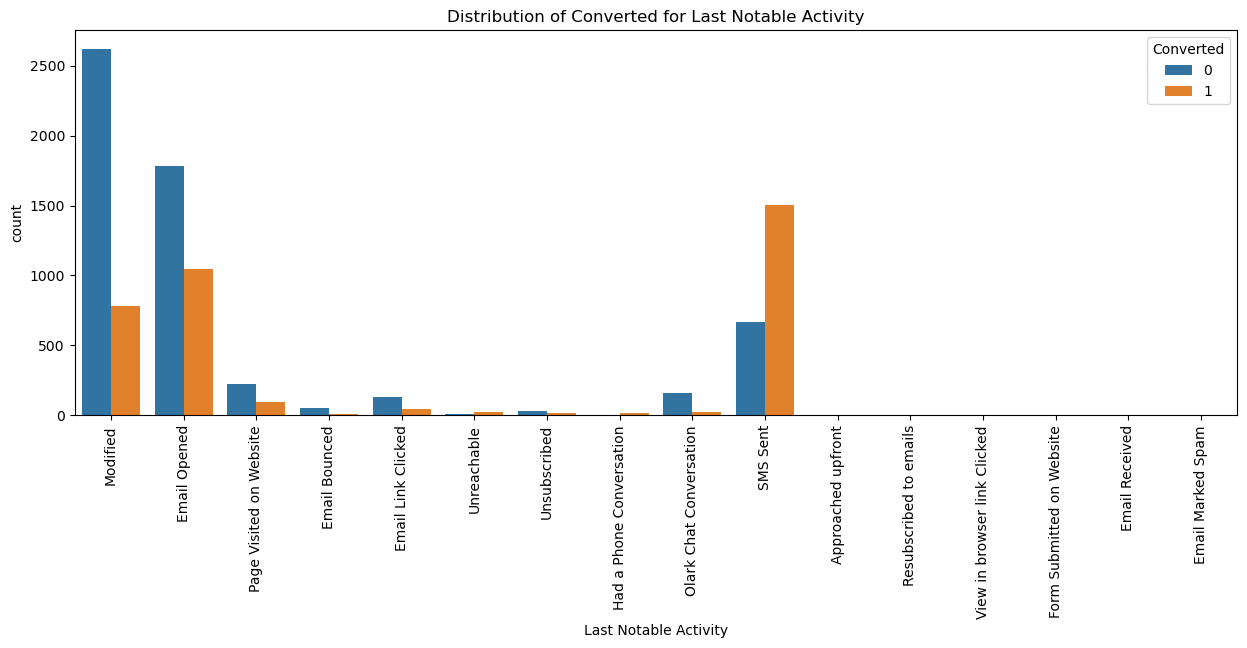

In [18]:
for i in leads.columns:
    
    if leads[i].dtype == 'object' or leads[i].nunique() < 30: 
        plt.figure(figsize=(15, 5))
        s1 = sns.countplot(x=i, hue=leads['Converted'],data=leads)
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
        plt.title(f'Distribution of Converted for {i}')
        plt.show()

### As seen from visualization Country and City columns are having high value present for a particular input hence we will drop the columns

In [19]:
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [20]:
leads['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [21]:
cols_to_drop = ['Country','City']

## Data imputation for null values treatment

In [22]:
# Checking of NaN values

leads['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [23]:
# Defining Nan values with Not Specified as huge no of input present in columns and can't drop due to data lose

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

In [24]:
leads['Specialization'].value_counts(dropna=False)

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

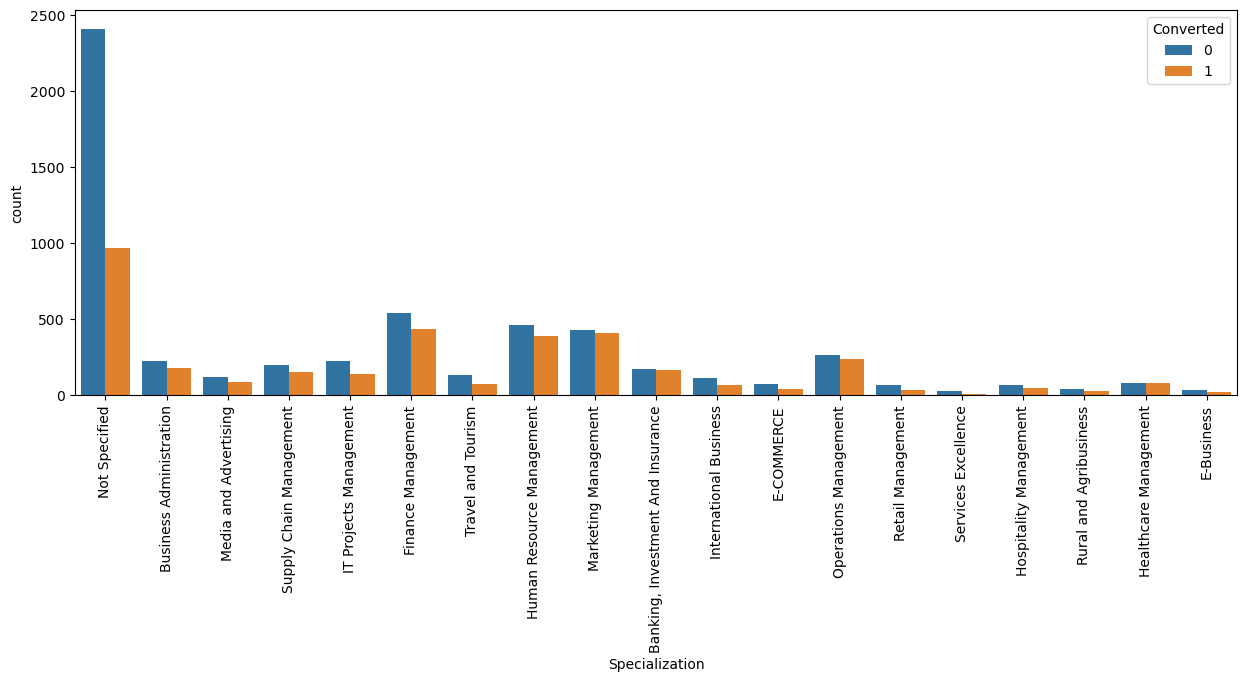

In [25]:
# As we have observed data visualization that different Management specialization are there so we use feature engineering to
# Collate all management group.

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## Feature engineering

In [26]:
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')

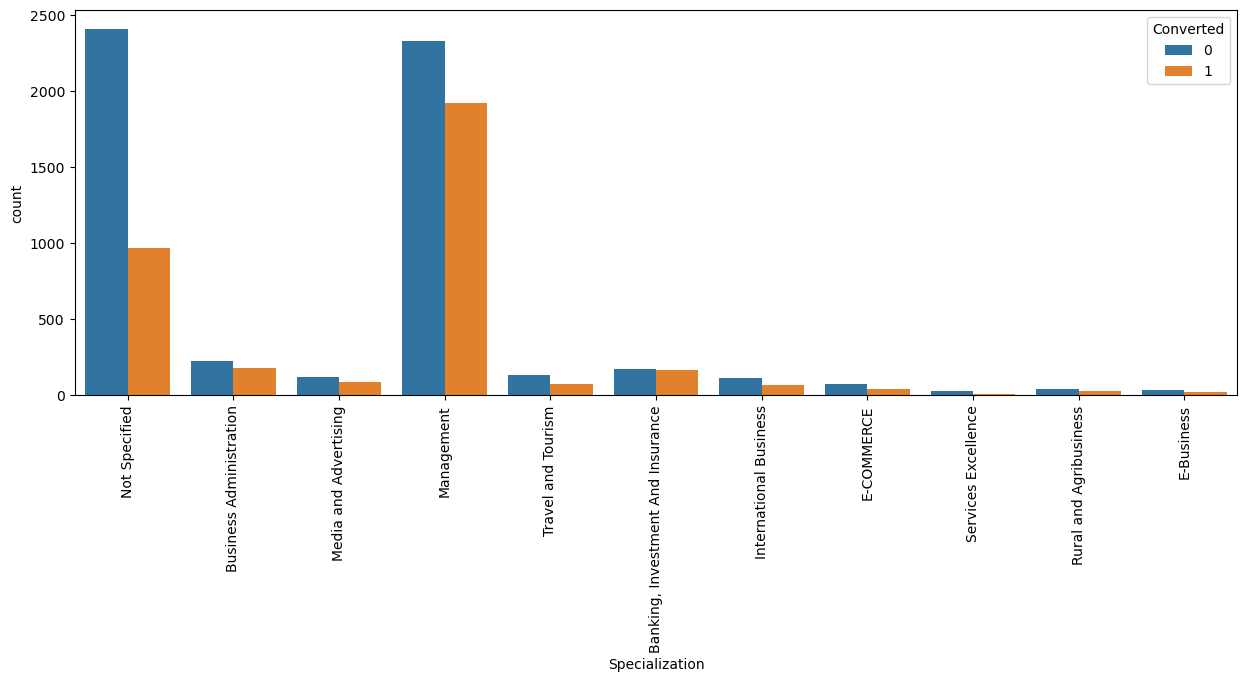

In [27]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
# Checking of Nan Values

leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [29]:
# Defining Nan values with Not Specified as huge no of input present in columns and cant drop due to data lose

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [30]:
leads['Tags'].value_counts(dropna=False)

Tags
Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

### Using feature engineering low count inputs are derived as Other_Tags

In [31]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')



In [32]:
leads['Tags'].value_counts(dropna=False)

Tags
Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

In [33]:
# Checking of Nan Values

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [34]:
# Defining Nan values with Not Specified as huge no of input present in columns and cant drop due to data lose

leads['What matters most to you in choosing a course'] = leads[
    'What matters most to you in choosing a course'].replace(np.nan,'Not Specified')

In [35]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
Not Specified                2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### Almost 2/3 of the data is biased and not specified so we will drop the columns

In [36]:
cols_to_drop.append('What matters most to you in choosing a course')

In [37]:
cols_to_drop

['Country', 'City', 'What matters most to you in choosing a course']

In [38]:
# Checking of NaN values

leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [39]:
# Defining Nan values with Not Specified as huge no of input present in columns and cant drop due to data lose

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Not Specified')

In [40]:
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [41]:
# Checking of Nan values

leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

### Gooogle and google are merging as both are same
#### Using Feature engineering to convert low value inputs to others
##### Facebook clasified as social media

In [42]:
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM',np.nan],'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

In [43]:
leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64

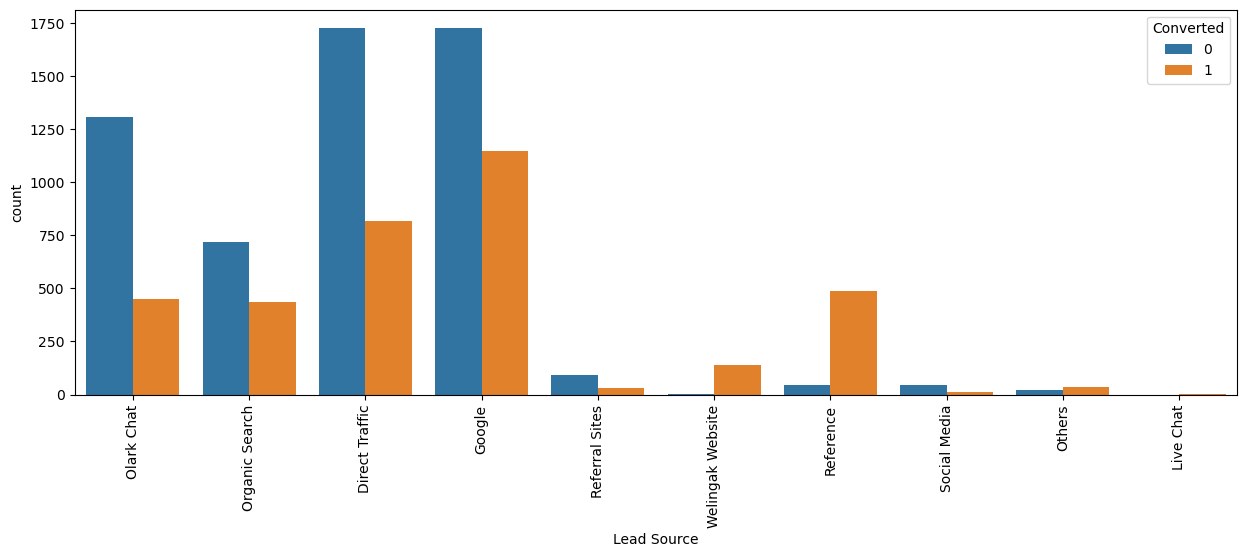

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [45]:
# Checking of Nan values

leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

## Using feature egineering low count inputs are derived as Others

In [46]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow',np.nan],'Others')


In [47]:
leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [48]:
leads.shape

(9240, 28)

In [49]:
100*leads.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Tags                                              0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Automation to check inputs in every columns

In [50]:
for i in leads.columns:
    print(leads[i].value_counts(dropna=False))
    print('__________________________')
    

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________
Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64
__________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
__________________________
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
__________________________
Converted
0    5679
1    3561
Name: count, dtype: int64
__________________________
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0

## Data Visualization before dropping less important columns

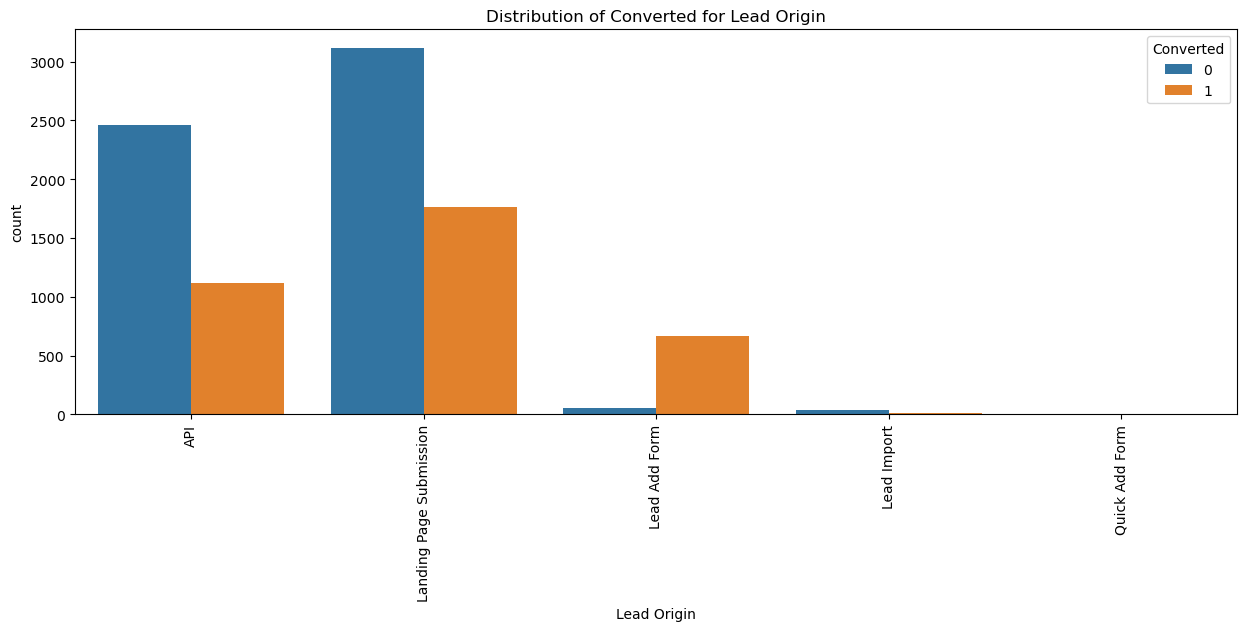

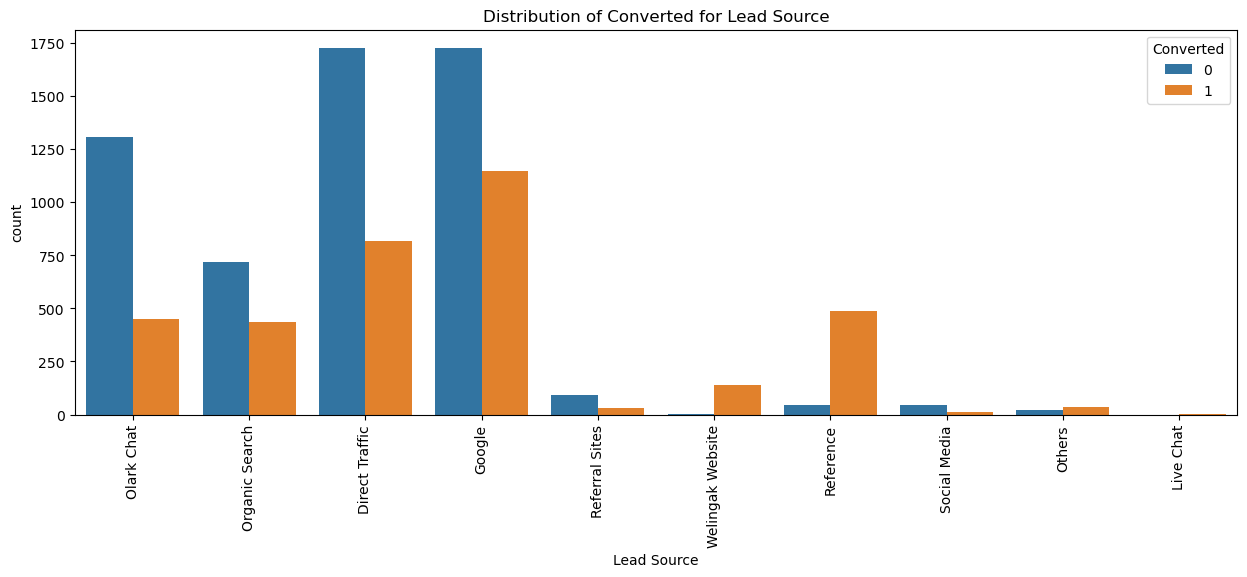

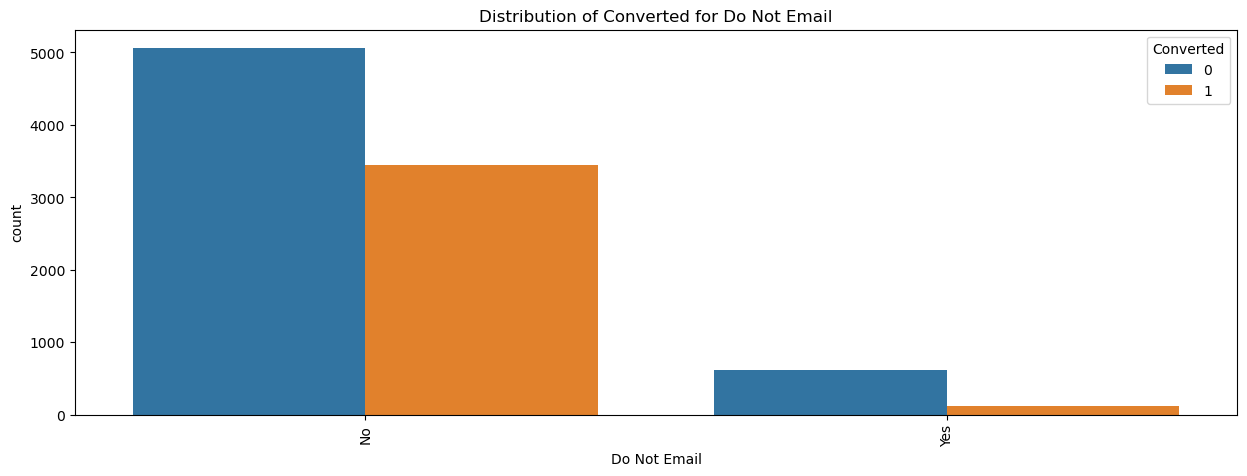

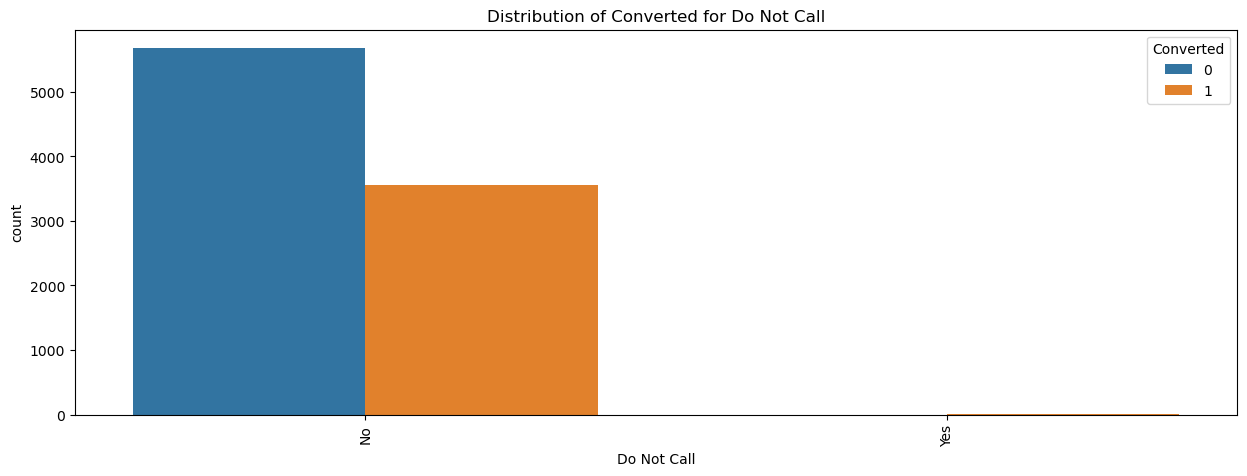

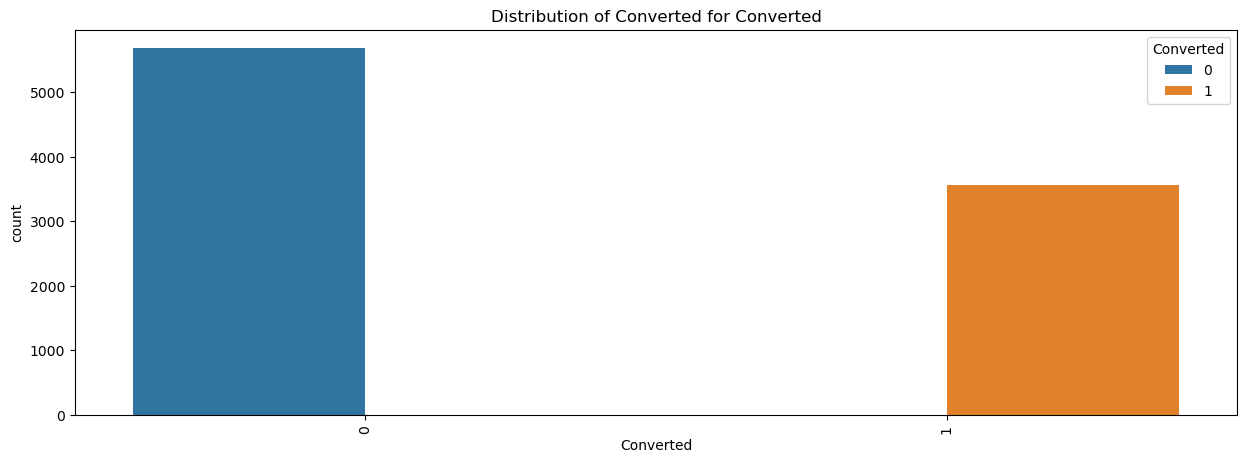

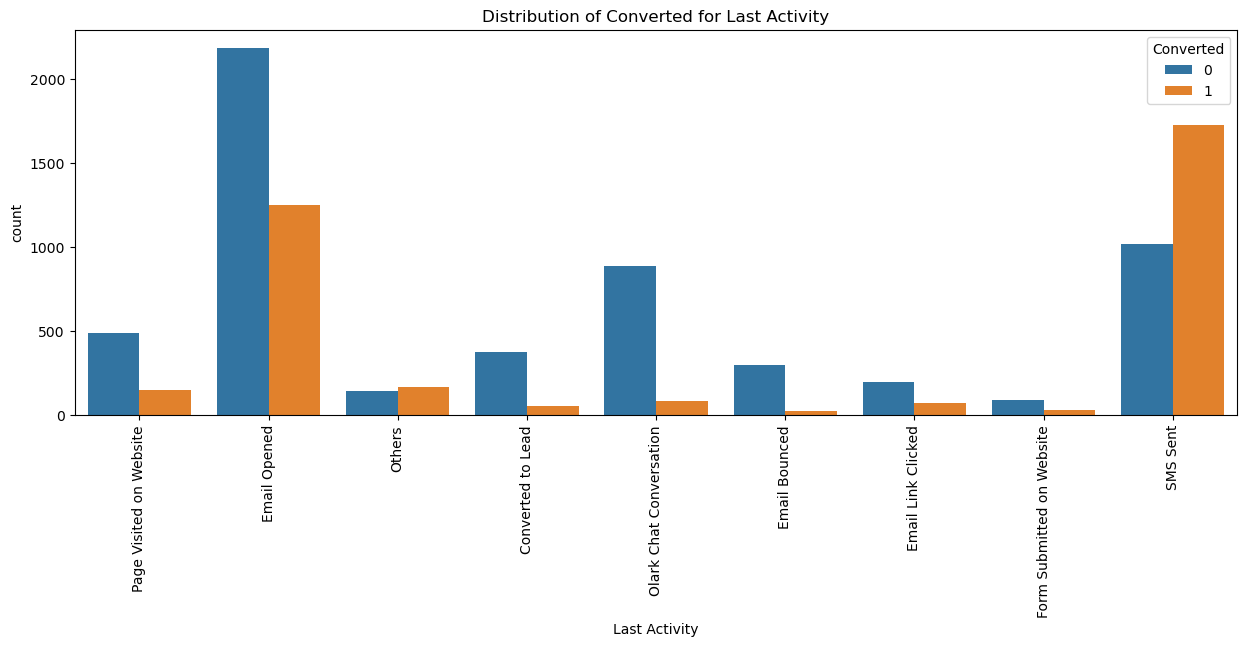

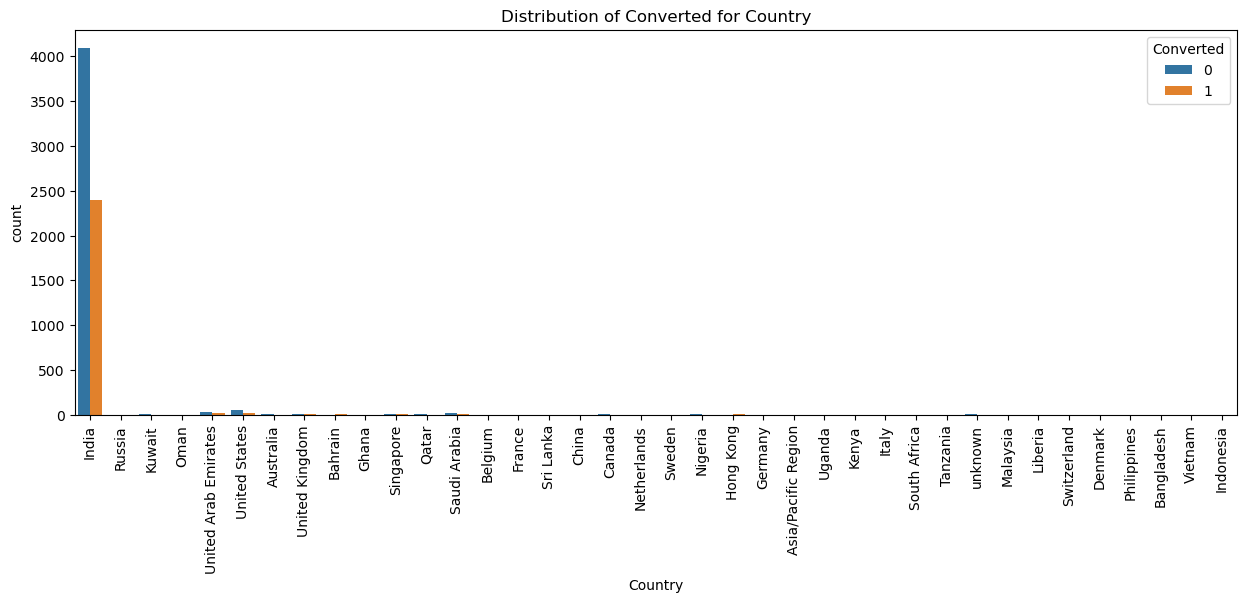

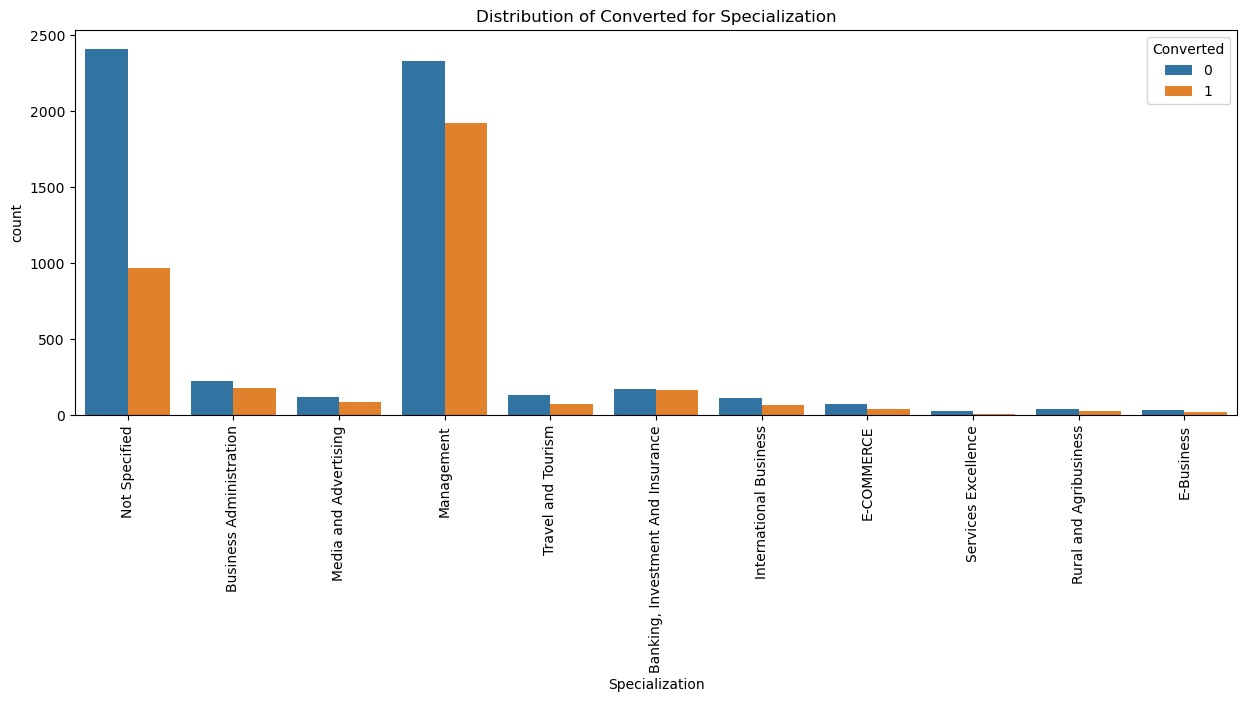

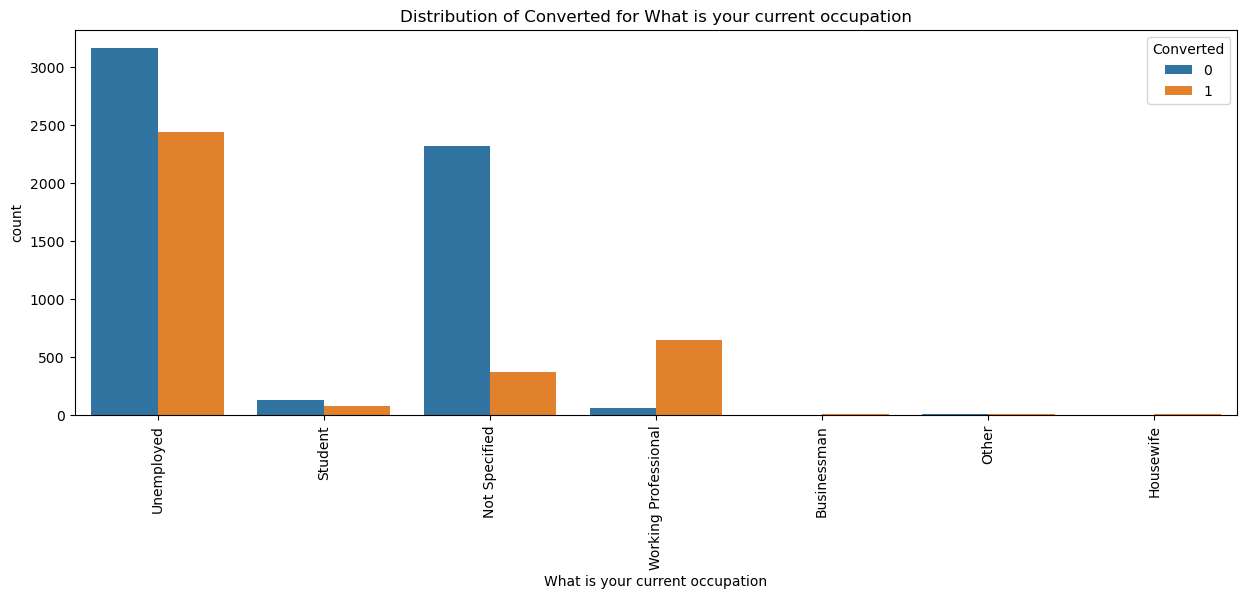

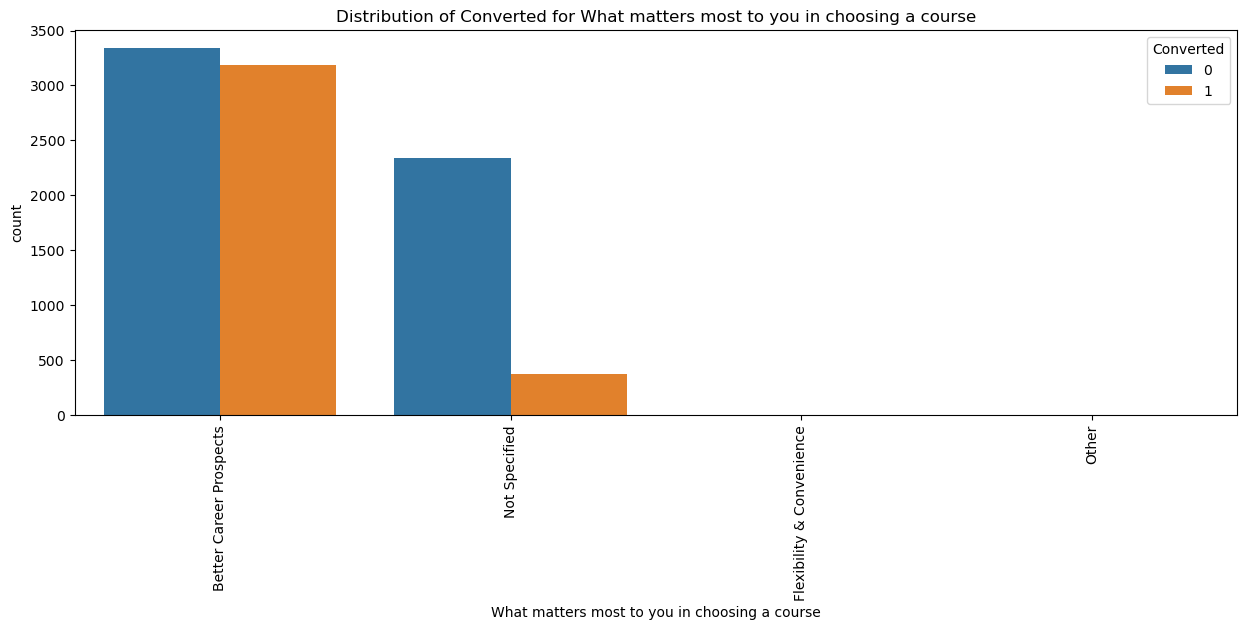

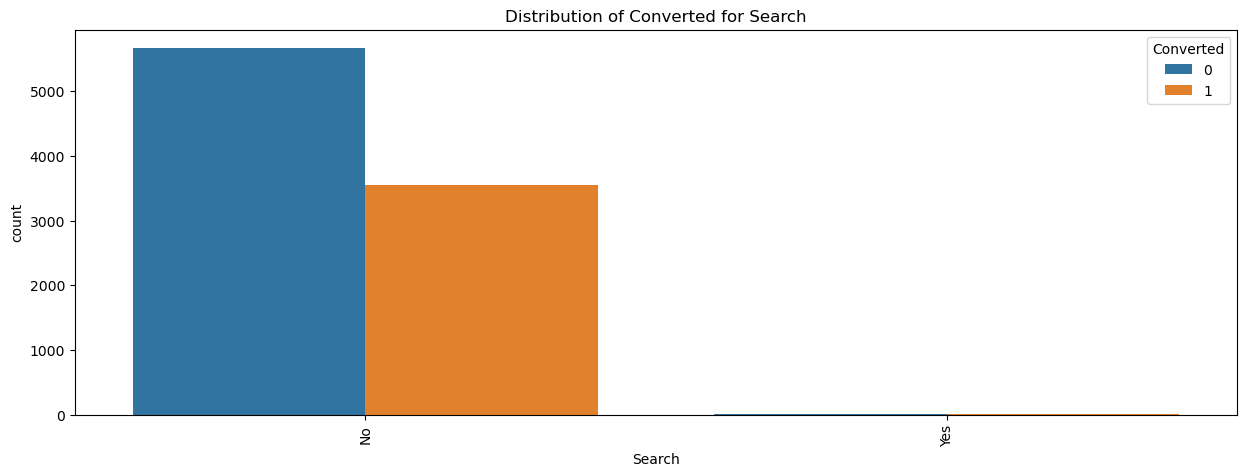

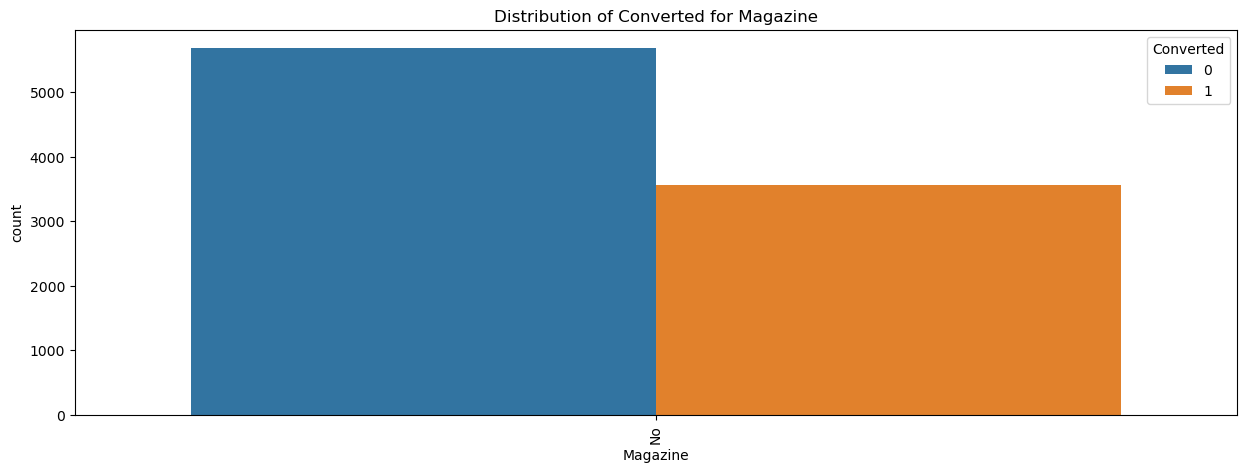

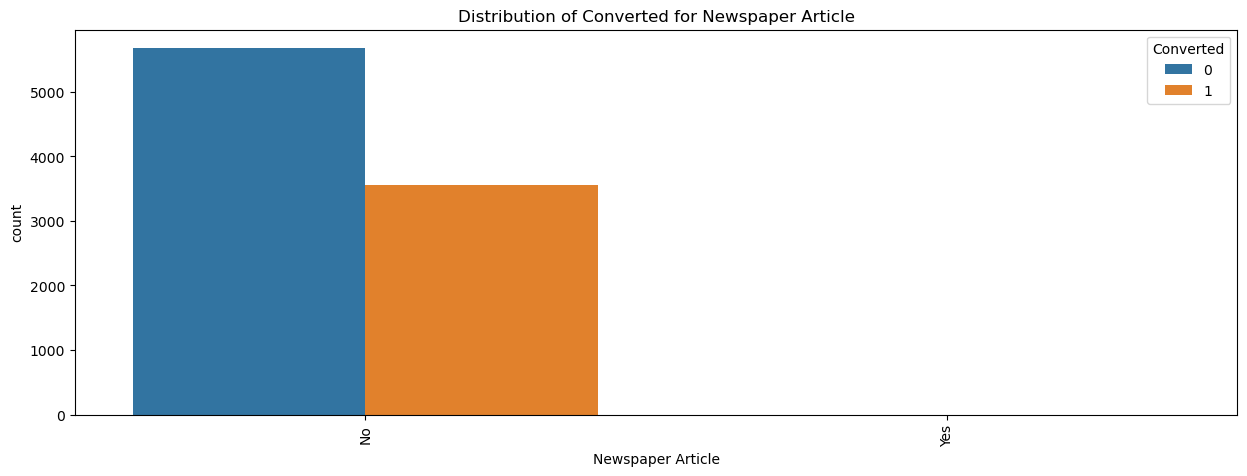

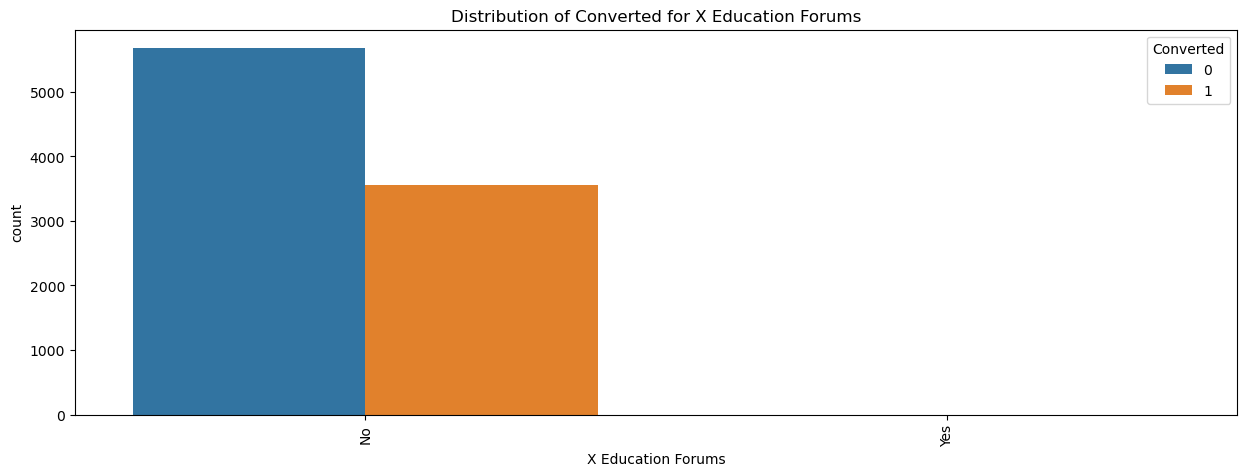

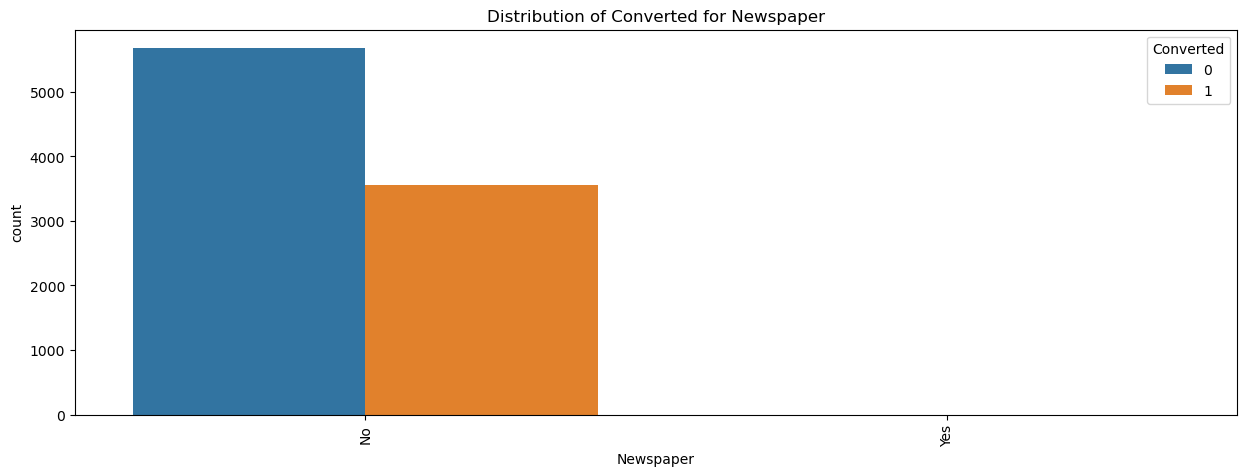

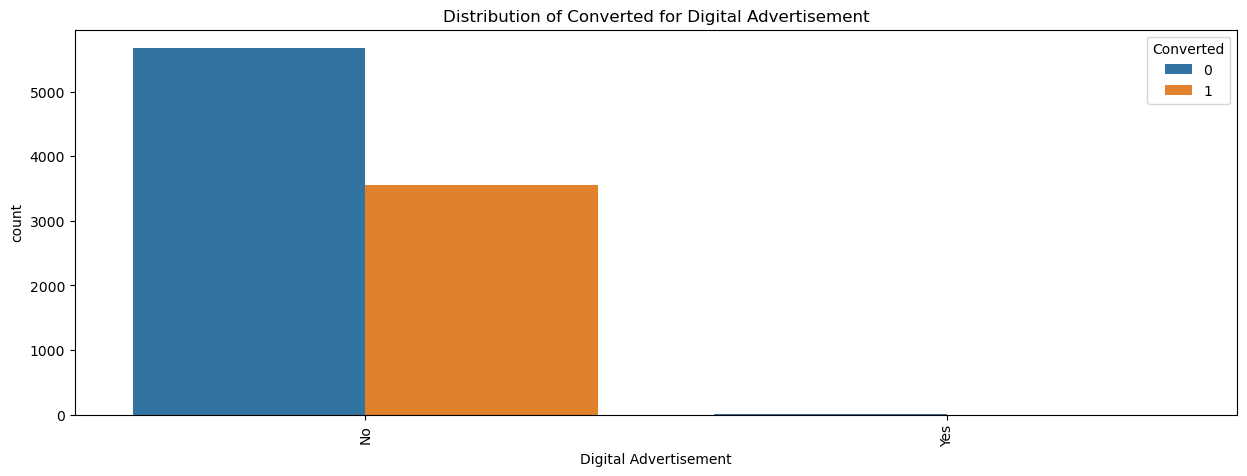

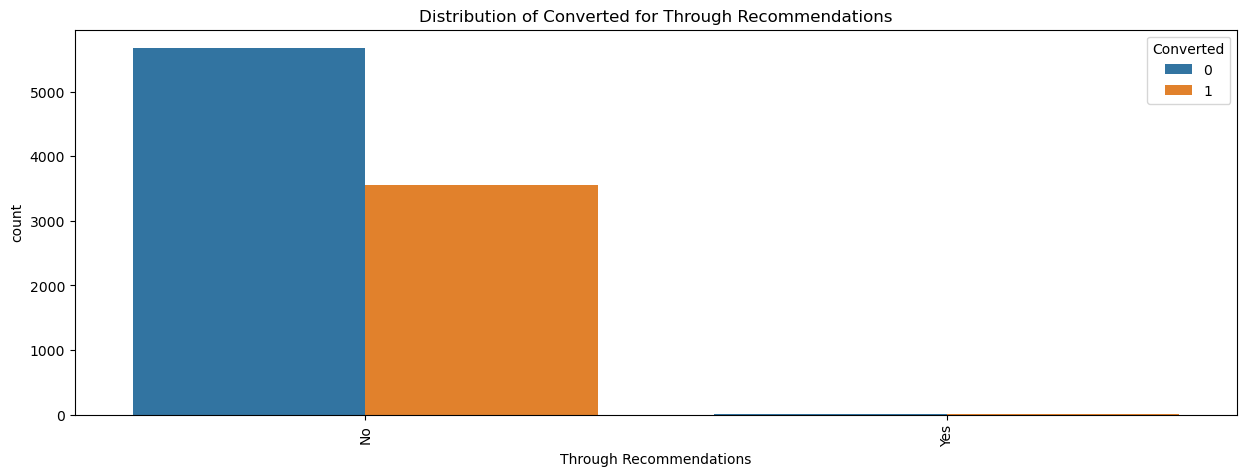

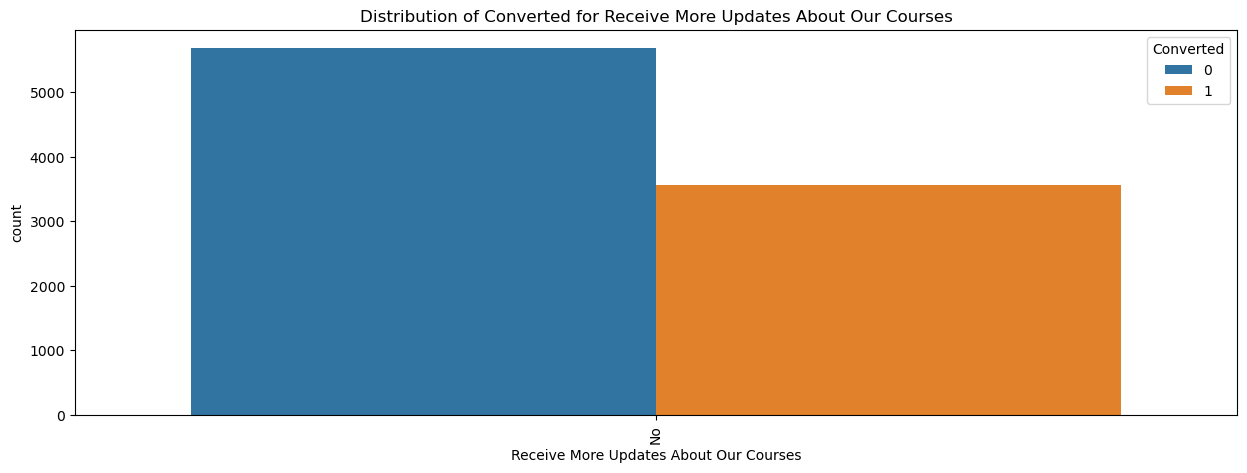

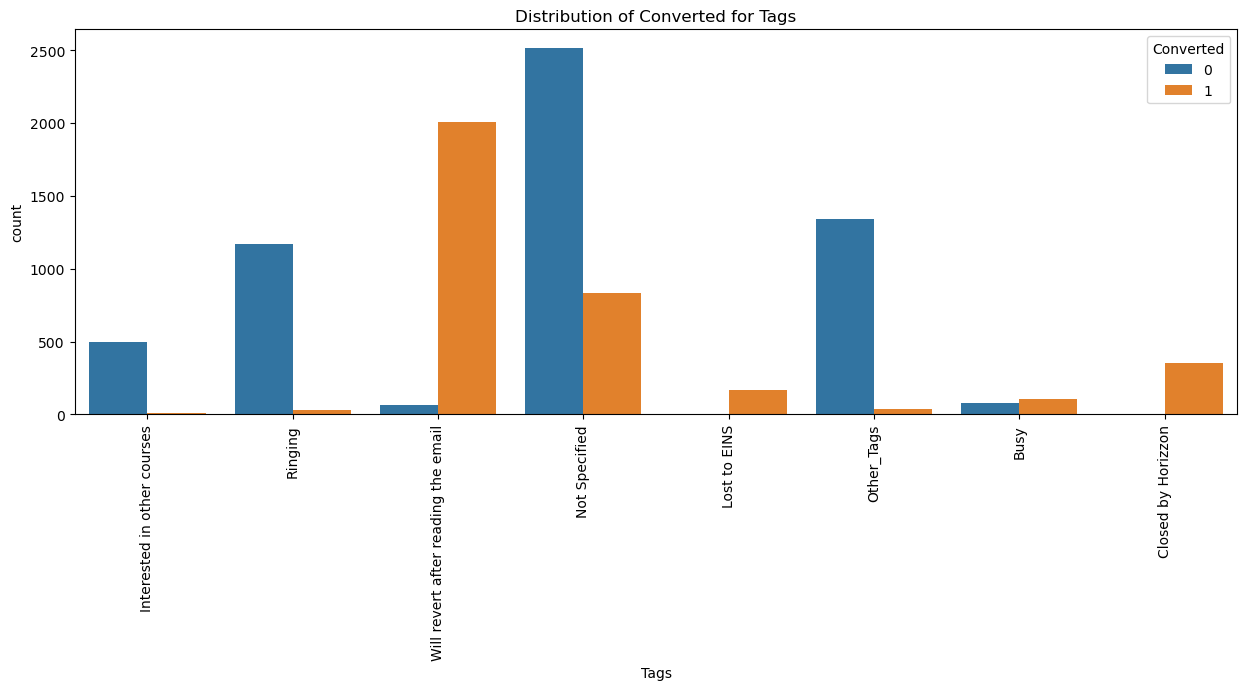

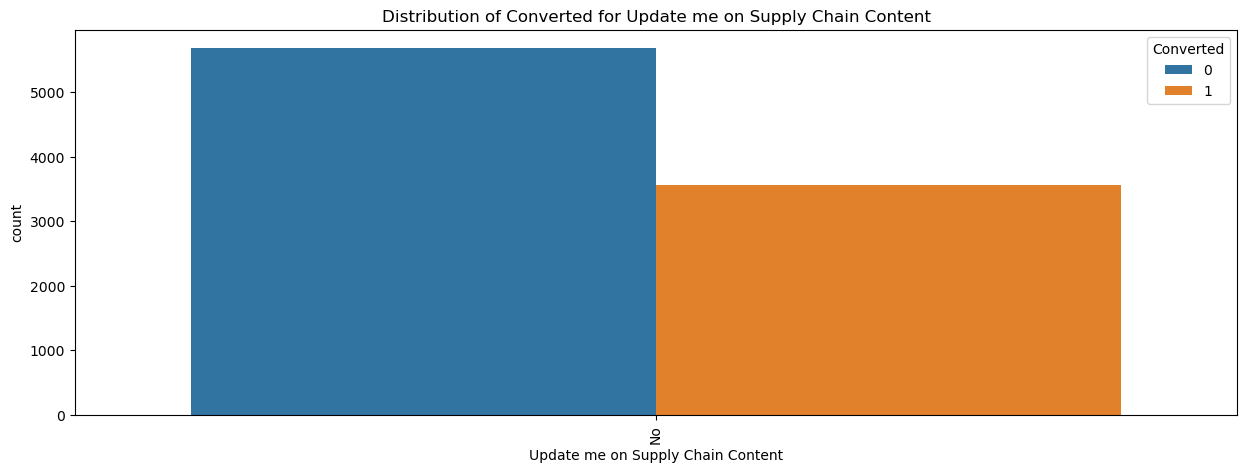

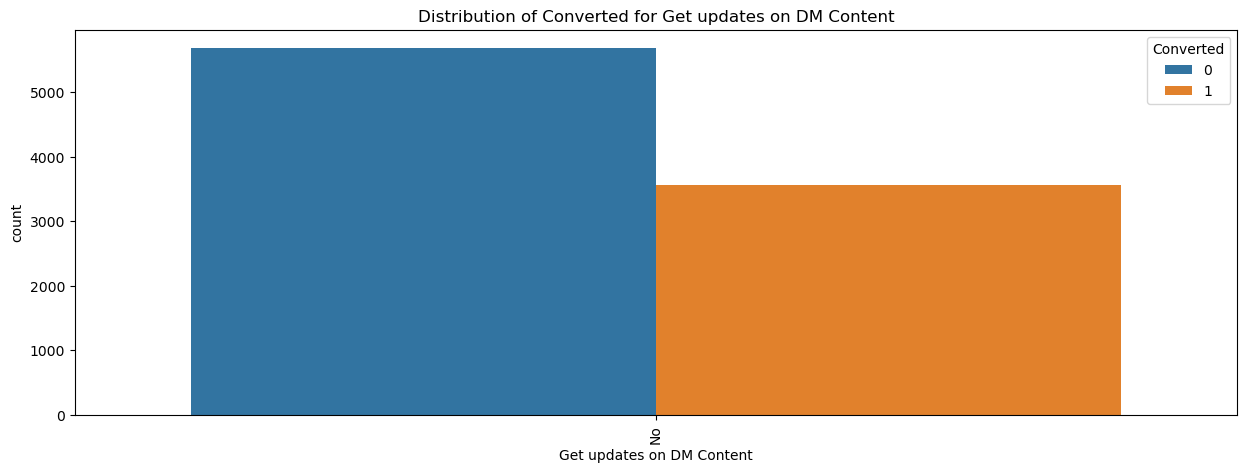

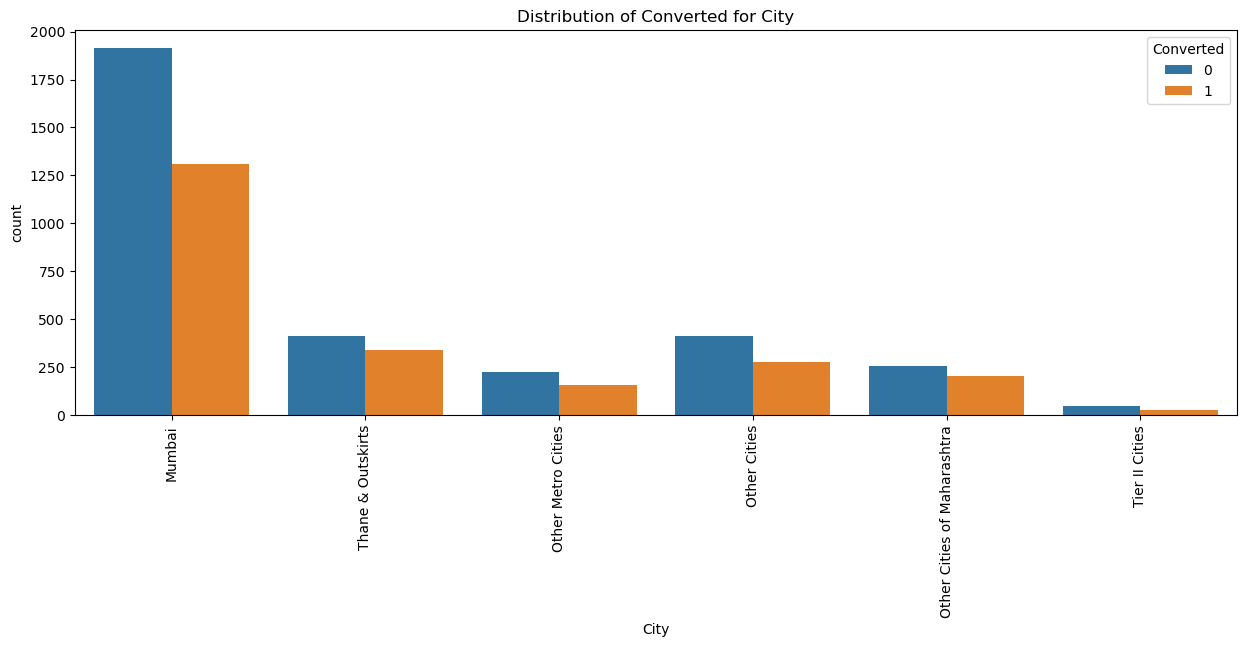

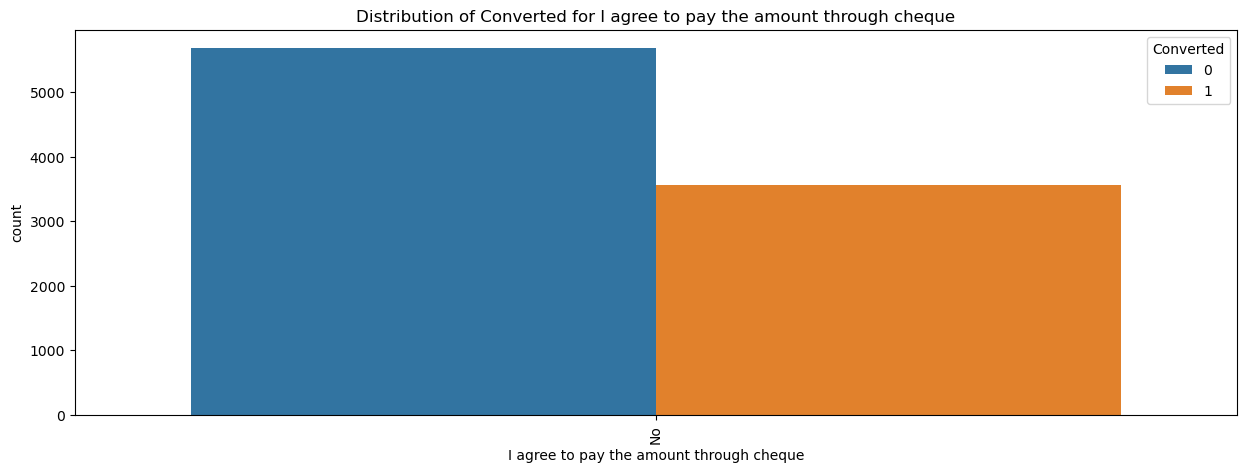

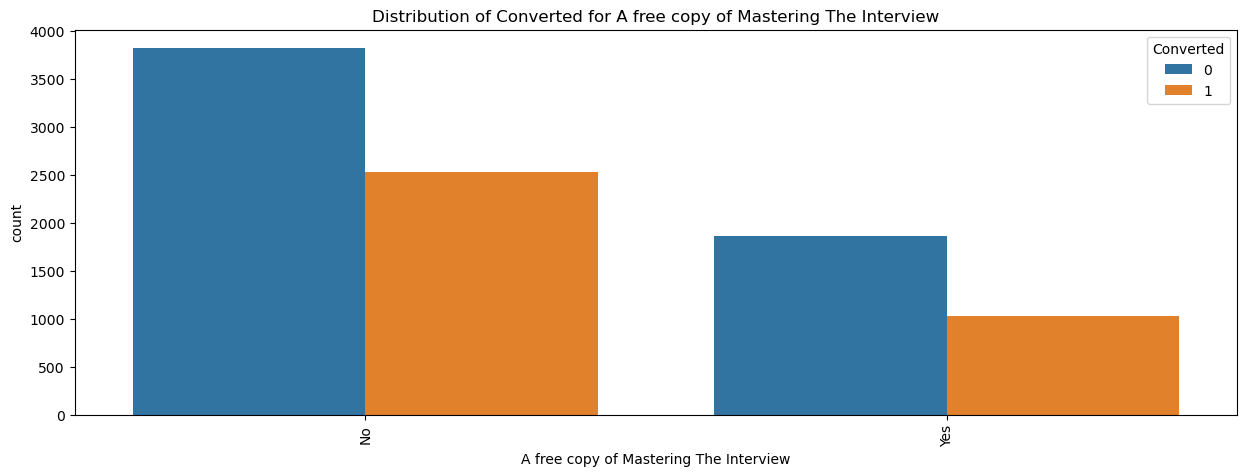

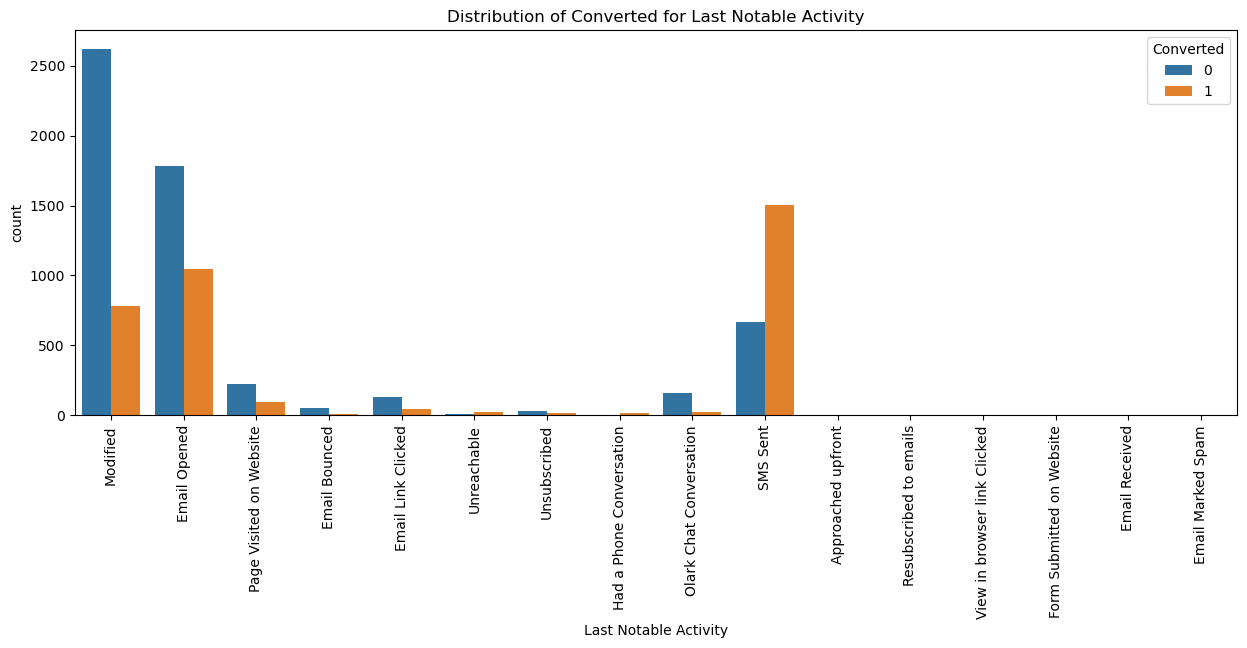

In [51]:
for i in leads.columns:
    
    if leads[i].dtype == 'object' or leads[i].nunique() < 30: 
        plt.figure(figsize=(15, 5))
        s1 = sns.countplot(x=i, hue=leads['Converted'],data=leads)
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
        plt.title(f'Distribution of Converted for {i}')
        plt.show()

## From Data visualization we have found b/m columns does not have any data spread and all are showing one particular input thus we should drop the columns

In [52]:
cols_to_drop.extend(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [53]:
leads = leads.drop(cols_to_drop,axis=1)

In [54]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [55]:
100*leads.isnull().mean().sort_values(ascending=False)

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

#### Total Visits(1.482684) Page Views Per Visit(1.482684) are having very less Nan values so we can drop in row wise and does not impact data loss

In [56]:
leads = leads.dropna()

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   object 
 

In [58]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


##### Deriving numeric columns

In [59]:
num_cols=[]
for i in leads.columns:
    
    if leads[i].dtype != 'object':
        num_cols.append(i)
        

In [60]:
num_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

#### Heat map to observe correlation between numeric variables

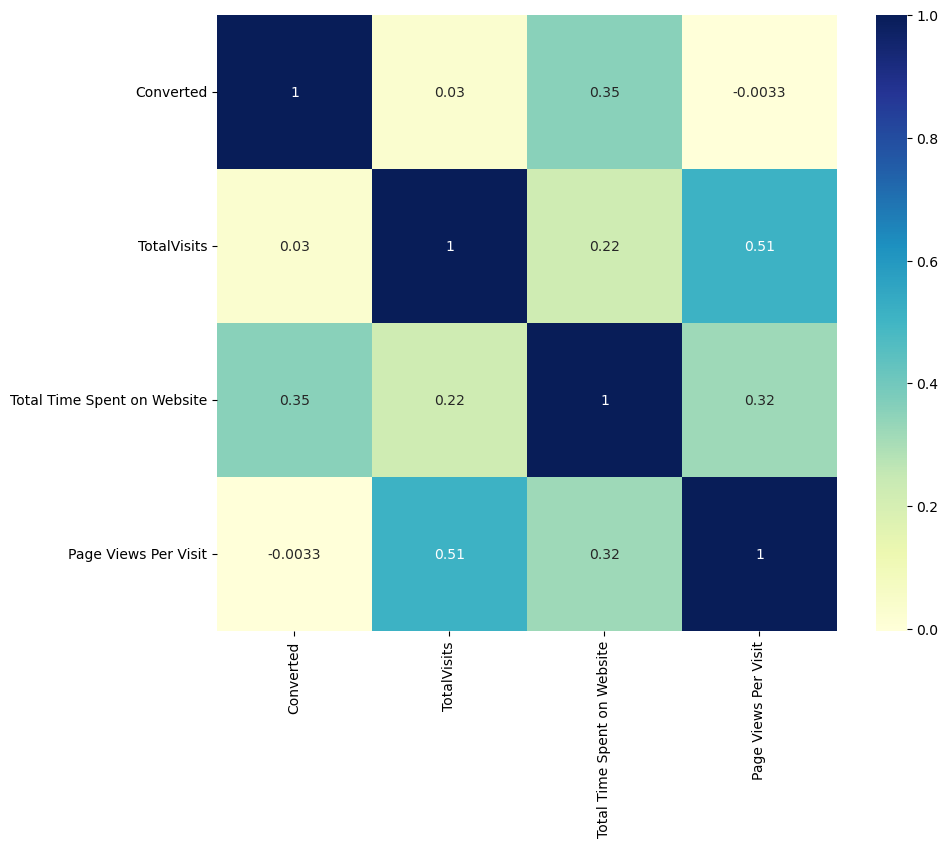

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(leads[num_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Data outlier check for numeric variables

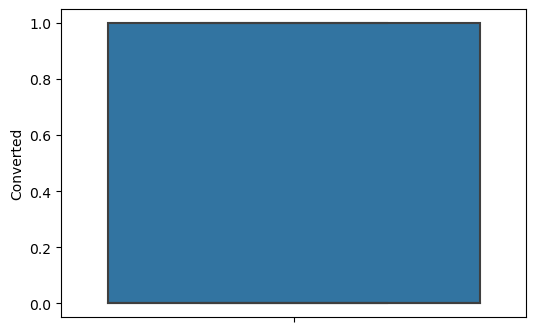

____________________________


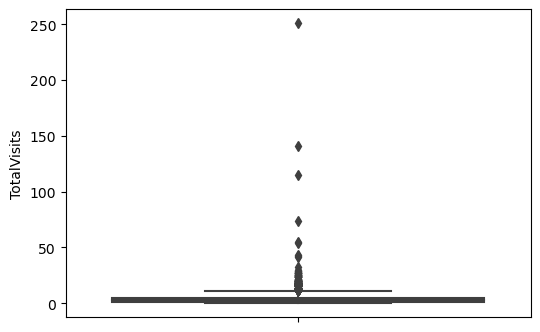

____________________________


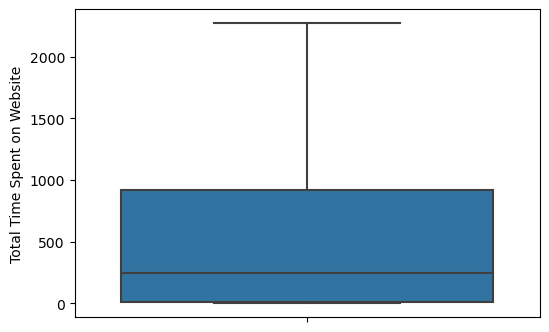

____________________________


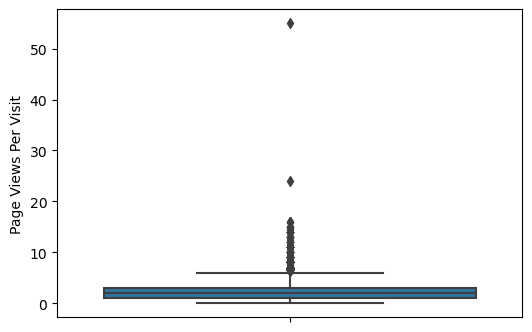

____________________________


In [62]:
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=leads[i])
    plt.show()
    print('____________________________')

#### Outlier treatment for numeric variables for data quality

In [63]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [64]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

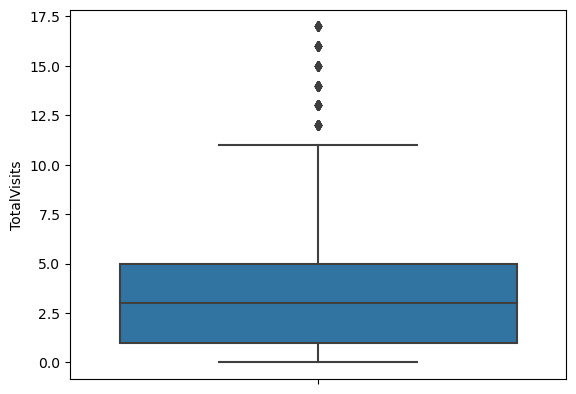

In [65]:
Q3 = leads['TotalVisits'].quantile(0.99)
leads = leads[leads['TotalVisits'] <= Q3]
Q1 = leads['TotalVisits'].quantile(0.01)
leads = leads[leads['TotalVisits'] >= Q1]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

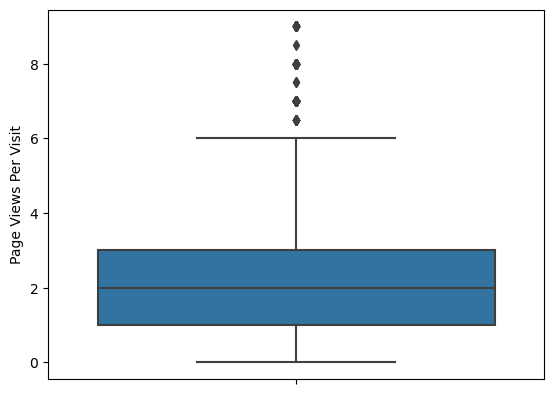

In [66]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [67]:
leads.shape

(8953, 13)

### Selecting categorical Columns

In [68]:
cat_cols=[]
for i in leads.columns:
    
    if leads[i].dtype == 'object':
        cat_cols.append(i)
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']


## Creating dummy variables and binary map for categorical variables

In [69]:
binary_columns =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[binary_columns] = leads[binary_columns].apply(binary_map)

In [70]:
for i in leads[cat_cols]:
    print(leads[i].value_counts(dropna=False))
    print('__________________________')

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: count, dtype: int64
__________________________
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: count, dtype: int64
__________________________
Do Not Email
0    8256
1     697
Name: count, dtype: int64
__________________________
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: count, dtype: int64
__________________________
Specialization
Management        

In [71]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [72]:
for i in leads[cat_cols]:
    print(leads[i].value_counts(dropna=False))
    print('__________________________')

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: count, dtype: int64
__________________________
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: count, dtype: int64
__________________________
Do Not Email
0    8256
1     697
Name: count, dtype: int64
__________________________
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: count, dtype: int64
__________________________
Specialization
Management        

In [73]:
# Dummy creation

leads = pd.get_dummies(leads,drop_first=True,dtype="int")
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [74]:
# Checking columns name after dummification

leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
      

In [75]:
# Removing not_specified columns which was previously inputted as select 

leads=leads.drop(['Specialization_Not Specified','Last Activity_Others','What is your current occupation_Not Specified',
                 'Tags_Not Specified','Last Notable Activity_Other_Notable_activity'],axis=1)

In [76]:
leads.shape

(8953, 50)

In [77]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


# Model Building
## Splitting the data in train and test

In [78]:
from sklearn.model_selection import train_test_split

y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   int32  
 6   Lead Origin_Lead Add Form                             6267 non-null   int32  
 7   Lead Origin_Lead Import                               6267 non-null   int32  
 8   Lead Source_Google                                    6267 n

## Scaling the data by min max scaler

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.0,0.294118,0.655810,0.555556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4696,0.0,0.176471,0.201144,0.333333,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3274,0.0,0.235294,0.055458,0.222222,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2164,0.0,0.117647,0.172975,0.222222,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1667,0.0,0.235294,0.513644,0.147778,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0


## Fitting the data in Logistic Regression model

In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


## Taking RFE support from sklearn to select important feature

In [84]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last

## Selecting columns as per RFE support imporatance

In [86]:
X_train_rfe =  X_train[ X_train.columns[rfe.support_] ]
X_train_rfe.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
9196,0.655810,0.555556,0,0,1,0,1,0,0,0,0,0,1,0,1
4696,0.201144,0.333333,0,0,1,0,1,0,0,0,0,0,1,0,1
3274,0.055458,0.222222,0,0,1,0,0,0,0,0,0,0,0,0,1
2164,0.172975,0.222222,0,0,0,0,1,0,0,1,0,0,0,0,0
1667,0.513644,0.147778,0,0,0,0,1,0,0,0,0,0,0,1,0


# Automation for model building

In [87]:
def build_model(X,y):
    X = sm.add_constant(X) 
    logm = sm.GLM(y,X).fit()
    print(logm.summary()) 
    return X
    
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


### Creating Model 1

In [88]:
X_train_mod1 = build_model(X_train_rfe, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Gaussian   Df Model:                           15
Link Function:               Identity   Scale:                        0.062084
Method:                          IRLS   Log-Likelihood:                -175.63
Date:                Mon, 16 Sep 2024   Deviance:                       388.08
Time:                        02:18:47   Pearson chi2:                     388.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9392
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [89]:
checkVIF(X_train_rfe)

,Features,VIF
6,What is your current occupation_Unemployed,7.19
4,Last Activity_SMS Sent,5.38
14,Last Notable Activity_SMS Sent,5.22
13,Tags_Will revert after reading the email,3.56
11,Tags_Other_Tags,2.63
1,Page Views Per Visit,2.49
12,Tags_Ringing,2.33
0,Total Time Spent on Website,2.26
7,What is your current occupation_Working Profes...,2.10
2,Lead Origin_Lead Add Form,1.85


In [90]:
# Dropping 'What is your current occupation_Unemployed' columns as it is having VIF >5

X = X_train_rfe.drop('What is your current occupation_Unemployed', axis=1)

### Model 2

In [91]:
X_train_mod2 = build_model(X, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                        0.072636
Method:                          IRLS   Log-Likelihood:                -668.01
Date:                Mon, 16 Sep 2024   Deviance:                       454.12
Time:                        02:18:47   Pearson chi2:                     454.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8944
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [92]:
checkVIF(X)

,Features,VIF
4,Last Activity_SMS Sent,5.37
13,Last Notable Activity_SMS Sent,5.17
1,Page Views Per Visit,2.44
0,Total Time Spent on Website,2.20
12,Tags_Will revert after reading the email,2.08
2,Lead Origin_Lead Add Form,1.83
3,Lead Source_Welingak Website,1.36
6,What is your current occupation_Working Profes...,1.31
11,Tags_Ringing,1.27
7,Tags_Closed by Horizzon,1.25


In [93]:
# Dropping 'What is your current occupation_Student' column as P value > .05

X1 = X.drop('What is your current occupation_Student', axis=1)

### model 3

In [94]:
X_train_mod3 = build_model(X1, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                        0.072627
Method:                          IRLS   Log-Likelihood:                -668.13
Date:                Mon, 16 Sep 2024   Deviance:                       454.14
Time:                        02:18:47   Pearson chi2:                     454.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8944
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [95]:
checkVIF(X1)

,Features,VIF
4,Last Activity_SMS Sent,5.37
12,Last Notable Activity_SMS Sent,5.17
1,Page Views Per Visit,2.44
0,Total Time Spent on Website,2.20
11,Tags_Will revert after reading the email,2.06
2,Lead Origin_Lead Add Form,1.83
3,Lead Source_Welingak Website,1.36
5,What is your current occupation_Working Profes...,1.31
10,Tags_Ringing,1.27
6,Tags_Closed by Horizzon,1.25


In [96]:
# Dropping 'Last Activity_SMS Sent' as VIF >5

X2=X1.drop('Last Activity_SMS Sent',axis=1)

### Model 4

In [97]:
X_train_mod4 = build_model(X2, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                        0.072652
Method:                          IRLS   Log-Likelihood:                -669.71
Date:                Mon, 16 Sep 2024   Deviance:                       454.37
Time:                        02:18:47   Pearson chi2:                     454.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8943
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
checkVIF(X2)

,Features,VIF
1,Page Views Per Visit,2.39
0,Total Time Spent on Website,2.19
10,Tags_Will revert after reading the email,2.06
2,Lead Origin_Lead Add Form,1.82
11,Last Notable Activity_SMS Sent,1.50
3,Lead Source_Welingak Website,1.36
4,What is your current occupation_Working Profes...,1.31
9,Tags_Ringing,1.27
5,Tags_Closed by Horizzon,1.25
8,Tags_Other_Tags,1.19


In [99]:
# Dropping 'What is your current occupation_Working Professional' as P value >.05

X3=X2.drop('What is your current occupation_Working Professional',axis=1)

### Model 5

In [100]:
X_train_mod5 = build_model(X3, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                        0.072644
Method:                          IRLS   Log-Likelihood:                -669.86
Date:                Mon, 16 Sep 2024   Deviance:                       454.39
Time:                        02:18:48   Pearson chi2:                     454.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8943
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [101]:
checkVIF(X3)

,Features,VIF
1,Page Views Per Visit,2.39
0,Total Time Spent on Website,2.19
9,Tags_Will revert after reading the email,1.86
2,Lead Origin_Lead Add Form,1.80
10,Last Notable Activity_SMS Sent,1.50
3,Lead Source_Welingak Website,1.35
8,Tags_Ringing,1.27
4,Tags_Closed by Horizzon,1.23
7,Tags_Other_Tags,1.19
5,Tags_Interested in other courses,1.07


## Model 5 is our final model as all VIF < 5  and p < .05 achieved for all features

# Prediction on train data using Model 5

In [102]:
X_train_final = sm.add_constant(X_train_mod5)

In [103]:
logm = sm.GLM(y_train,X_train_mod5).fit()

In [104]:
# Predicted value on train data

y_train_pred = logm.predict(X_train_final)
y_train_pred[:10]

9196    0.340290
4696    0.195851
3274    0.400593
2164    0.023371
1667    0.915955
7024    0.162752
8018    0.162752
778     0.151159
6942   -0.030656
4440    0.158503
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.34029006,  0.19585116,  0.40059305,  0.0233709 ,  0.91595541,
        0.16275236,  0.16275236,  0.15115894, -0.03065593,  0.15850297])

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.340290,9196
1,0,0.195851,4696
2,0,0.400593,3274
3,0,0.023371,2164
4,1,0.915955,1667


In [107]:
# Prediction against conversion using assumption Converted_prob >.5 = 1

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.340290,9196,0
1,0,0.195851,4696,0
2,0,0.400593,3274,0
3,0,0.023371,2164,0
4,1,0.915955,1667,1


##### Confusion Matrix creation for Sensitivity, specificity, recall, precision and ROC curve

In [108]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3815   67]
 [ 481 1904]]


In [109]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9125578426679432


### As per trained data overall accuracy is about 91% so far good model 

In [110]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [111]:
# Sensitivity

TP / float(TP+FN)

0.7983228511530398

In [112]:
# Specificity

TN / float(TN+FP)

0.9827408552292632

In [113]:
# False positive is low hence we can say model predicted converted those which are not converted rate is low as per our model 

print(FP/ float(TN+FP))

0.017259144770736732


In [114]:
# positive prediction which are actually converted rate is high

print (TP / float(TP+FP))

0.9660071029934043


# ROC curve creation

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

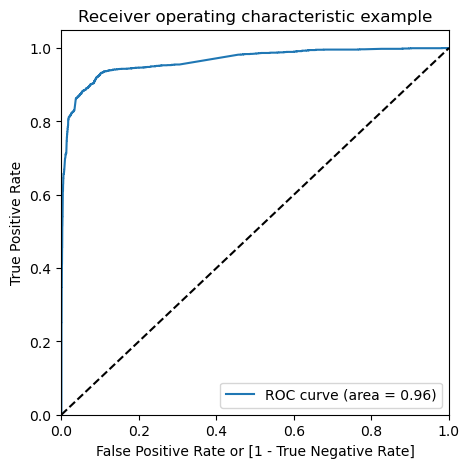

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# As per the ROC curve we achieved .96 which is very near to 1 and a good predictive model

## Instead of selecting random value of .5 we are trying to find optimal value for cutoff

In [118]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.340290,9196,0,1,1,1,1,0,0,0,0,0,0
1,0,0.195851,4696,0,1,1,0,0,0,0,0,0,0,0
2,0,0.400593,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.023371,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.915955,1667,1,1,1,1,1,1,1,1,1,1,1


#### Automation to find accuracy,sensi,speci on different cutoff values

In [119]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.570927  0.995807  0.309892
0.1   0.1  0.620233  0.991195  0.392324
0.2   0.2  0.869475  0.944235  0.823545
0.3   0.3  0.912877  0.916562  0.910613
0.4   0.4  0.924206  0.861635  0.962648
0.5   0.5  0.912558  0.798323  0.982741
0.6   0.6  0.895644  0.747589  0.986605
0.7   0.7  0.887506  0.725367  0.987120
0.8   0.8  0.858944  0.637317  0.995106
0.9   0.9  0.806925  0.496017  0.997939


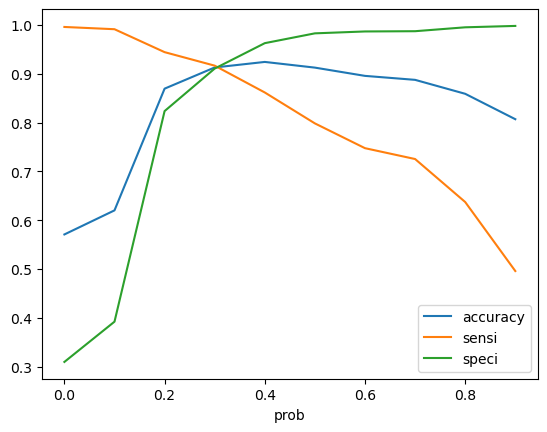

In [120]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [121]:
# From the above plot we can take 0.3 as optimal value of cutoff

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.340290,9196,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.195851,4696,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.400593,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.023371,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.915955,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Assigning lead score from Converted probability

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(abs(x)*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.340290,9196,1,34
1,0,0.195851,4696,0,20
2,0,0.400593,3274,1,40
3,0,0.023371,2164,0,2
4,1,0.915955,1667,1,92


In [123]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9128769746290091

#### Overall accuracy on Trained data is 91.28%

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3535,  347],
       [ 199, 2186]], dtype=int64)

In [125]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [126]:
# Overall Sensitivity

TP / float(TP+FN)

0.9165618448637316

In [127]:
# Overall Specificity

TN / float(TN+FP)

0.9106130860381246

In [128]:
# False Positive

FP/ float(TN+FP)

0.08938691396187533

In [129]:
# Positive Predicted value

TP / float(TP+FP)

0.863008290564548

In [130]:
# Negative predicted value

TN / float(TN+ FN)

0.9467059453668988

In [131]:
# Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.863008290564548

In [132]:
# Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9165618448637316

# Prediction on Test data

In [133]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.0,0.294118,0.145327,0.277778,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
984,0.0,0.176471,0.085514,0.333333,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
8135,1.0,0.117647,0.426636,0.222222,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6915,0.0,0.235294,0.065888,0.222222,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2712,0.0,0.176471,0.117757,0.333333,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0


In [134]:
X_test = X_test[X3.columns]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7681,0.145327,0.277778,0,0,0,0,0,0,1,0,1
984,0.085514,0.333333,0,0,0,0,0,1,0,0,0
8135,0.426636,0.222222,0,0,0,0,0,0,0,0,1
6915,0.065888,0.222222,0,0,0,0,0,0,1,0,0
2712,0.117757,0.333333,0,0,0,0,0,0,0,1,0


In [135]:
X_test_sm = sm.add_constant(X_test)

In [136]:
logm = sm.GLM(y_test,X_test_sm).fit()

In [137]:
y_test_pred = logm.predict(X_test_sm)
y_test_pred[:10]

7681    0.162510
984    -0.042353
8135    0.504694
6915   -0.076781
2712    0.770466
244    -0.024632
4698   -0.062878
8287    0.163204
6791    0.869416
8970    0.032073
dtype: float64

In [138]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
y_pred_1.head()

,0
7681,0.162510
984,-0.042353
8135,0.504694
6915,-0.076781
2712,0.770466


In [140]:
y_test_df = pd.DataFrame(y_test)

In [141]:
y_test_df['Prospect ID'] = y_test_df.index

In [142]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.162510
1,0,984,-0.042353
2,0,8135,0.504694
3,0,6915,-0.076781
4,1,2712,0.770466


In [145]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [146]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.162510
1,0,984,-0.042353
2,0,8135,0.504694
3,0,6915,-0.076781
4,1,2712,0.770466


In [147]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(abs(x)*100))

In [148]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.162510,16
1,984,0,-0.042353,4
2,8135,0,0.504694,50
3,6915,0,-0.076781,8
4,2712,1,0.770466,77


### Prediction on test data using optimal cutoff value of 0.3

In [149]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [150]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.162510,16,0
1,984,0,-0.042353,4,0
2,8135,0,0.504694,50,1
3,6915,0,-0.076781,8,0
4,2712,1,0.770466,77,1


In [151]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9233060312732688

# Overall accuracy of the model on test data is 92.33% .

In [152]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1556,  120],
       [  86,  924]], dtype=int64)

In [153]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [154]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9148514851485149

In [155]:
# specificity
TN / float(TN+FP)

0.9284009546539379

In [156]:
# Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8850574712643678

In [157]:
# Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9148514851485149

Summary :

Train Data: 
Accuracy : 91.28%
Sensitivity : 91.65%
Specificity : 91.06%

Test Data: 
Accuracy : 92.33%
Sensitivity : 91.49%
Specificity : 92.84%

